# This is a notebook used to analyse the expected outcome that implementing a new evaluation system would have on the overall grades of students at the Engineering School of the National University of Asuncion

# ABACOS Y DEMAS FUNCIONES NECESARIAS EN EL ANÁLISIS (necessary functions)

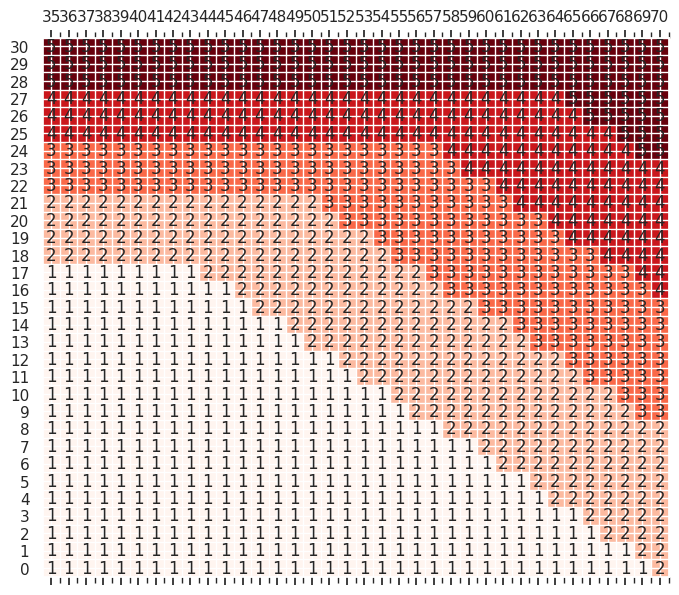

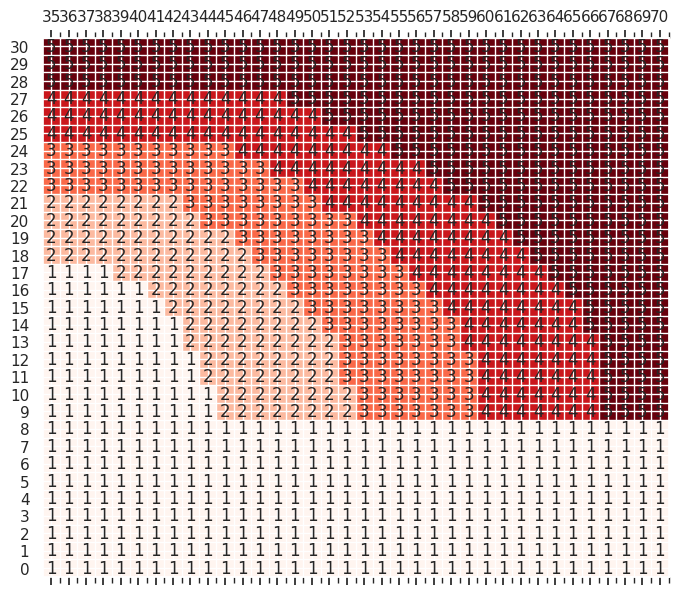

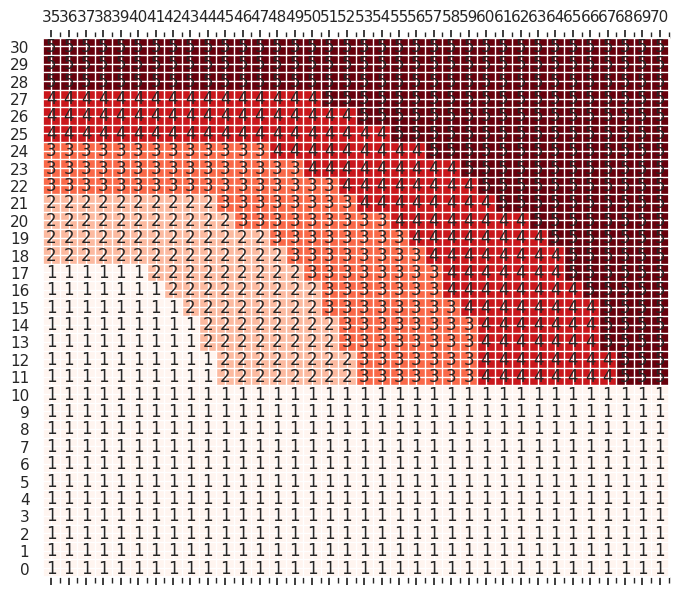

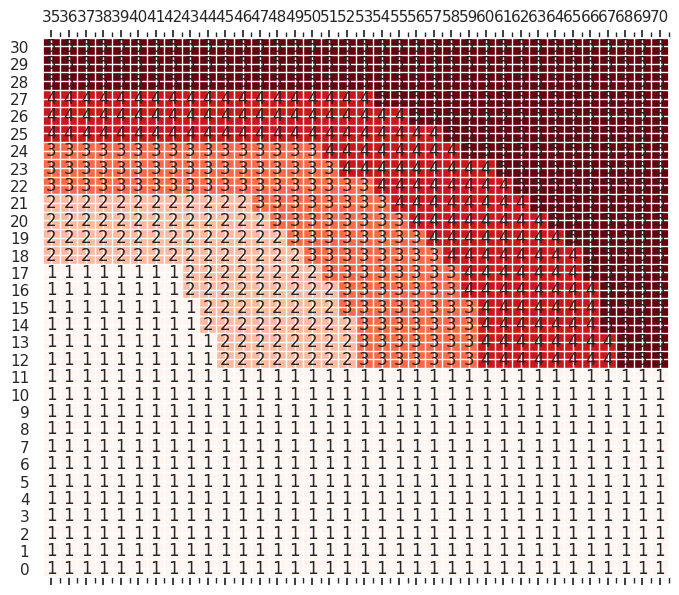

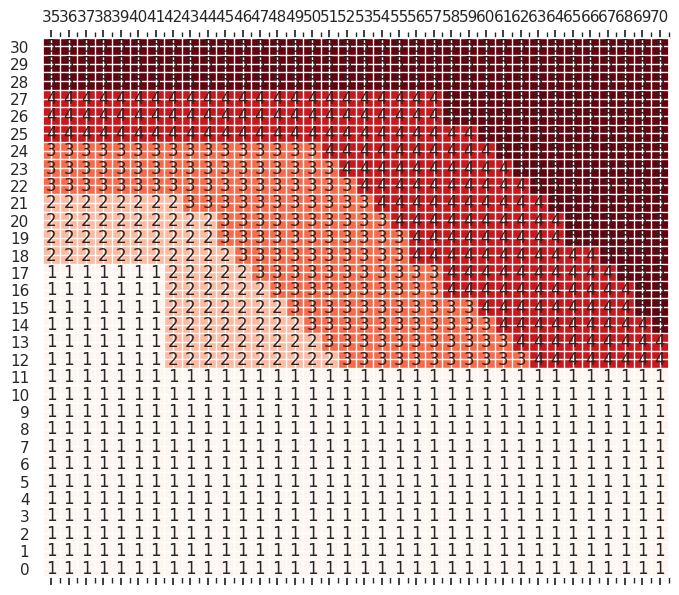

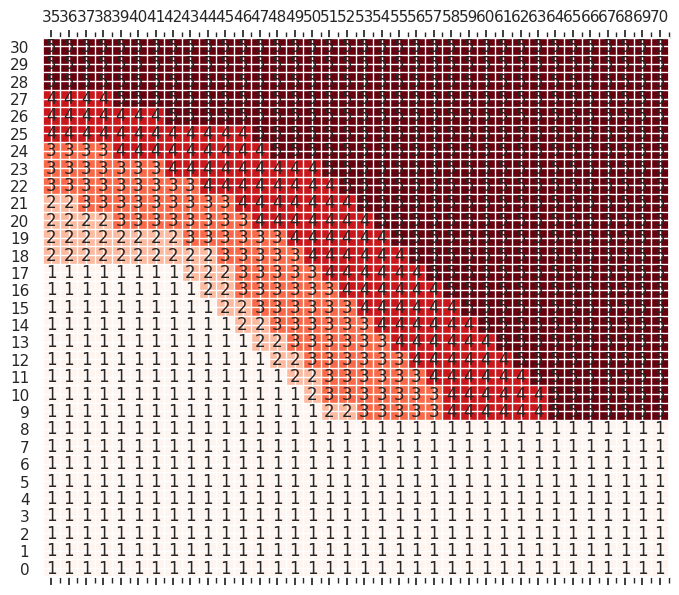

In [3]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

#Funciones de abacos y esas cosas

### Matriz que representa al esquema de puntajes actual
# Cargado a mano pq no se en que criterio se basa
abaco_actual= np.array([
                       [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #30
                       [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #29
                       [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #28
                       [4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #27
                       [4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #26
                       [4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #25
                       [3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #24
                       [3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #23
                       [3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #22
                       [2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #21
                       [2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #20
                       [2,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #19
                       [2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #18
                       [1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5],   #17 listo y para arriba tambien
                       [1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5],   #16
                       [1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5],   #15
                       [1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5],   #14
                       [1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5],   #13
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5],   #12
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5],   #11
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5],   #10
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5],   #9 listo y para abajo tambien
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #8
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #7
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #6
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #5
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #4
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #3
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #2
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],   #1
                       [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]    #0
                      #35,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0
                        ],dtype=int)

### Matriz que representa al esquema de puntajes presentado por direccion academica
abaco_DA= np.ones([31,36],int);

rangefilas= list(range(0,31)); rangefilas.reverse();
rangecolumnas= list(range(35,71));
#PRIMERA OPCION CON EL MINIMO EN 9PTS, SEGUNDA CON EL MINIMO EN 12PTS
for i in rangefilas: #iterador de filas, osea el eje y. Empieza en 30 y termina en 8
    for j in rangecolumnas: #iterador de columnas, osea el eje x. Empieza en 35 y termina en 70

        CP= 0.6*(j/70) + 0.4*(i/30) #funcion que nos otorga la nota si el rendimiento del final es menor a esto

        if (i >= 30*0.91): #un examen final de mas de 27.3
            abaco_DA[30-i][j-35]= 5

        elif (i >= 30*0.81): #un examen final de mas de 24.3
            if(CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            else:
                abaco_DA[30-i][j-35]= 4

        elif (i >= 30*0.71): #un examen final de mas de 21.3
            if  (CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_DA[30-i][j-35]= 4
            else:
                abaco_DA[30-i][j-35]= 3

        elif (i >= 30*0.6): #un examen final de mas de 18
            if  (CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_DA[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_DA[30-i][j-35]= 3
            else:
                abaco_DA[30-i][j-35]= 2

        elif (i >= 30*0.4): #esto es para los que hacen mas de doce y tiene firma alta
            if  (CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_DA[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_DA[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_DA[30-i][j-35]= 2

        elif (i>= 30*0.3): #esto es para los que hacen mas de nueve y tienen firma alta en el primer esquema
            if  (CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_DA[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_DA[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_DA[30-i][j-35]= 2

        else: #esto es para las personas que hacen menos que nueve
            if  (CP >= 0.91):
                abaco_DA[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_DA[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_DA[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_DA[30-i][j-35]= 2
            else:
                abaco_DA[30-i][j-35]= 1

### Matriz que representa la contrapropuesta 1 de abaco
abaco_CP1= np.ones([31,36],int);

rangefilas= list(range(0,31)); rangefilas.reverse();
rangecolumnas= list(range(35,71));
#PRIMERA OPCION CON EL MINIMO EN 9PTS, SEGUNDA CON EL MINIMO EN 12PTS
for i in rangefilas: #iterador de filas, osea el eje y. Empieza en 30 y termina en 8
    for j in rangecolumnas: #iterador de columnas, osea el eje x. Empieza en 35 y termina en 70

        wx= 0.907  #peso otorgado al puntaje de proceso
        wy= 1.108  #peso otorgado al puntaje del examen final
        dy= 9.00  #desplazamiento en el eje del examen final
        dx= 0.00  #desplazamiento en el eje del proceso
        ymin= 9   #Por ahora fijamos en 9 que es el 30% del final

        CP= ( wx*((j-dx)/(70))**2 + wy*((i-dy)/(30))**2 )**(1/2) #funcion que nos otorga la nota si el rendimiento del final es menor a esto

        if (i >= 30*0.91): #un examen final de mas de 27.3
            abaco_CP1[30-i][j-35]= 5

        elif (i >= 30*0.81): #un examen final de mas de 24.3
            if(CP >= 0.91):
                abaco_CP1[30-i][j-35]= 5
            else:
                abaco_CP1[30-i][j-35]= 4

        elif (i >= 30*0.71): #un examen final de mas de 21.3
            if  (CP >= 0.91):
                abaco_CP1[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP1[30-i][j-35]= 4
            else:
                abaco_CP1[30-i][j-35]= 3

        elif (i >= 30*0.6): #un examen final de mas de 18
            if  (CP >= 0.91):
                abaco_CP1[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP1[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP1[30-i][j-35]= 3
            else:
                abaco_CP1[30-i][j-35]= 2

        elif (i >= 30*0.4): #esto es para los que hacen mas de doce y tiene firma alta
            if  (CP >= 0.91):
                abaco_CP1[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP1[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP1[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_CP1[30-i][j-35]= 2

        elif (i>= 30*0.3): #esto es para los que hacen mas de nueve y tienen firma alta
            if  (CP >= 0.91):
                abaco_CP1[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP1[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP1[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_CP1[30-i][j-35]= 2

        else: #esto es para las personas que hacen menos que nueve
            if  (CP >= 0.91):
                abaco_CP1[30-i][j-35]= 1
            elif(CP >= 0.81):
                abaco_CP1[30-i][j-35]= 1
            elif(CP >= 0.71):
                abaco_CP1[30-i][j-35]= 1
            elif(CP >= 0.60):
                abaco_CP1[30-i][j-35]= 1
            else:
                abaco_CP1[30-i][j-35]= 1

### Matriz que representa la contrapropuesta 2 de abaco
abaco_CP2= np.ones([31,36],int);

rangefilas= list(range(0,31)); rangefilas.reverse();
rangecolumnas= list(range(35,71));
#PRIMERA OPCION CON EL MINIMO EN 9PTS, SEGUNDA CON EL MINIMO EN 12PTS
for i in rangefilas: #iterador de filas, osea el eje y. Empieza en 30 y termina en 8
    for j in rangecolumnas: #iterador de columnas, osea el eje x. Empieza en 35 y termina en 70

        wx= 0.90  #peso otorgado al puntaje de proceso
        wy= 1.20  #peso otorgado al puntaje del examen final
        dy= 10.5  #desplazamiento en el eje del examen final
        dx= 0.00  #desplazamiento en el eje del proceso
        ymin= 11   #Por ahora fijamos en 9 que es el 30% del final

        CP= ( wx*((j-dx)/(70))**2 + wy*((i-dy)/(30))**2 )**(1/2) #funcion que nos otorga la nota si el rendimiento del final es menor a esto

        if (i >= 30*0.91): #un examen final de mas de 27.3
            abaco_CP2[30-i][j-35]= 5

        elif (i >= 30*0.81): #un examen final de mas de 24.3
            if(CP >= 0.91):
                abaco_CP2[30-i][j-35]= 5
            else:
                abaco_CP2[30-i][j-35]= 4

        elif (i >= 30*0.71): #un examen final de mas de 21.3
            if  (CP >= 0.91):
                abaco_CP2[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP2[30-i][j-35]= 4
            else:
                abaco_CP2[30-i][j-35]= 3

        elif (i >= 30*0.6): #un examen final de mas de 18
            if  (CP >= 0.91):
                abaco_CP2[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP2[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP2[30-i][j-35]= 3
            else:
                abaco_CP2[30-i][j-35]= 2

        elif (i >= 30*0.35): #esto es para los que hacen mas del 35% en final y tienen firma alta
            if  (CP >= 0.91):
                abaco_CP2[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP2[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP2[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_CP2[30-i][j-35]= 2

        elif (i>= 30*0.3): #esto es para los que hacen mas de nueve y tienen firma alta
            if  (CP >= 0.91):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.81):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.71):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.60):
                abaco_CP2[30-i][j-35]= 1

        else: #esto es para las personas que hacen menos que nueve
            if  (CP >= 0.91):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.81):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.71):
                abaco_CP2[30-i][j-35]= 1
            elif(CP >= 0.60):
                abaco_CP2[30-i][j-35]= 1
            else:
                abaco_CP2[30-i][j-35]= 1


### Matriz que representa la contrapropuesta 3 de abaco
abaco_CP3= np.ones([31,36],int);

rangefilas= list(range(0,31)); rangefilas.reverse();
rangecolumnas= list(range(35,71));
#PRIMERA OPCION CON EL MINIMO EN 9PTS, SEGUNDA CON EL MINIMO EN 12PTS
for i in rangefilas: #iterador de filas, osea el eje y. Empieza en 30 y termina en 8
    for j in rangecolumnas: #iterador de columnas, osea el eje x. Empieza en 35 y termina en 70

        wx= 0.90  #peso otorgado al puntaje de proceso
        wy= 1.20  #peso otorgado al puntaje del examen final
        dy= 12.0  #desplazamiento en el eje del examen final
        dx= 0.00  #desplazamiento en el eje del proceso
        ymin= 12   #Por ahora fijamos en 9 que es el 30% del final

        CP= ( wx*((j-dx)/(70))**2 + wy*((i-dy)/(30))**2 )**(1/2) #funcion que nos otorga la nota si el rendimiento del final es menor a esto

        if (i >= 30*0.91): #un examen final de mas de 27.3
            abaco_CP3[30-i][j-35]= 5

        elif (i >= 30*0.81): #un examen final de mas de 24.3
            if(CP >= 0.91):
                abaco_CP3[30-i][j-35]= 5
            else:
                abaco_CP3[30-i][j-35]= 4

        elif (i >= 30*0.71): #un examen final de mas de 21.3
            if  (CP >= 0.91):
                abaco_CP3[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP3[30-i][j-35]= 4
            else:
                abaco_CP3[30-i][j-35]= 3

        elif (i >= 30*0.6): #un examen final de mas de 18
            if  (CP >= 0.91):
                abaco_CP3[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP3[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP3[30-i][j-35]= 3
            else:
                abaco_CP3[30-i][j-35]= 2

        elif (i >= 30*0.4): #esto es para los que hacen mas del 40% en final y tienen firma alta
            if  (CP >= 0.91):
                abaco_CP3[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP3[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP3[30-i][j-35]= 3
            elif(CP >= 0.60):
                abaco_CP3[30-i][j-35]= 2

        elif (i>= 30*0.3): #esto es para los que hacen mas de nueve y tienen firma alta
            if  (CP >= 0.91):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.81):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.71):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.60):
                abaco_CP3[30-i][j-35]= 1

        else: #esto es para las personas que hacen menos que nueve
            if  (CP >= 0.91):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.81):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.71):
                abaco_CP3[30-i][j-35]= 1
            elif(CP >= 0.60):
                abaco_CP3[30-i][j-35]= 1
            else:
                abaco_CP3[30-i][j-35]= 1

### Matriz que representa la contrapropuesta 4 de abaco
abaco_CP4= np.ones([31,36],int);

rangefilas= list(range(0,31)); rangefilas.reverse();
rangecolumnas= list(range(35,71));
#PRIMERA OPCION CON EL MINIMO EN 9PTS, SEGUNDA CON EL MINIMO EN 12PTS
for i in rangefilas: #iterador de filas, osea el eje y. Empieza en 30 y termina en 8
    for j in rangecolumnas: #iterador de columnas, osea el eje x. Empieza en 35 y termina en 70

        CP= 0.7*(j/70 +0.10) + 0.3*(i/30) #funcion que nos otorga la nota si el rendimiento del final es menor a esto

        if (i >= 30*0.91): #un examen final de mas de 27.3
            abaco_CP4[30-i][j-35]= 5

        elif (i >= 30*0.81): #un examen final de mas de 24.3
            if(CP >= 0.91):
                abaco_CP4[30-i][j-35]= 5
            else:
                abaco_CP4[30-i][j-35]= 4

        elif (i >= 30*0.71): #un examen final de mas de 21.3
            if  (CP >= 0.91):
                abaco_CP4[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP4[30-i][j-35]= 4
            else:
                abaco_CP4[30-i][j-35]= 3

        elif (i >= 30*0.6): #un examen final de mas de 18
            if  (CP >= 0.91):
                abaco_CP4[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP4[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP4[30-i][j-35]= 3
            else:
                abaco_CP4[30-i][j-35]= 2

        elif (i >= 30*0.4 and j>=70*0.6): #un examen final de mas de 12 (40%) con proceso mayor a 42 (60%)
            if  (CP >= 0.91):
                abaco_CP4[30-i][j-35]= 5
            elif(CP >= 0.81):
                abaco_CP4[30-i][j-35]= 4
            elif(CP >= 0.71):
                abaco_CP4[30-i][j-35]= 3
            else:
                abaco_CP4[30-i][j-35]= 2


#Matriz del abaco
def dibujarAbaco(mat,num_color):
    fig, ax = plt.subplots(figsize=(11, 7))
    if num_color==1:
      ax.matshow(mat, cmap=plt.cm.YlGnBu)
    elif num_color==2:
      ax.matshow(mat, cmap=plt.cm.Greens)
    elif num_color==3:
      ax.matshow(mat, cmap=plt.cm.Reds)
    #Colocamos los numeritos en los ejes
    ax.xaxis.set_major_locator(mticker.FixedLocator(range(36)))
    ax.set_xticklabels(rangecolumnas,minor=False)
    ax.yaxis.set_major_locator(mticker.FixedLocator(range(31)))
    ax.set_yticklabels(rangefilas,minor=False)
    #las posiciones para el grid
    ax.xaxis.set_minor_locator(mticker.FixedLocator(range(36)))
    ax.set_xticks([x - 0.5 for x in range(36)][1:]+[35.5],minor=True)
    ax.yaxis.set_minor_locator(mticker.FixedLocator(range(31)))
    ax.set_yticks([y - 0.5 for y in range(31)][0:],minor=True)
    #graficamos
    ax.grid(which='minor')
    #
    for (i, j), z in np.ndenumerate(mat):
        ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
    plt.show()


dibujarAbaco(abaco_DA ,3)
dibujarAbaco(abaco_CP1,3)
dibujarAbaco(abaco_CP2,3)
dibujarAbaco(abaco_CP3,3)
dibujarAbaco(abaco_CP4,3)
dibujarAbaco(abaco_actual,3)

def obtener_nota(abaco,exoneracion,Pproceso,Pfinal):
  try:
    if (exoneracion==True):
      if   (Pproceso>=63.7):
        return 5
      elif (Pproceso>=56.7):
        return 4
      elif (Pproceso>=49.7):
        return 3
    #Si no cumple ningun caso o exoneracion es false, cae en esto
    return abaco[int(30-Pfinal)][int(Pproceso-35)] #70/2=35
  except:
    print(Pproceso-35,',',30-Pfinal)

## **IMPORTAMOS Y UTILIZAMOS EL NUEVO DATASET**

##  Notas a tener en cuenta:

  1) Se modifico la columna de cod.curso para que se llame semestre. Se modifico la columna semestre para que se llame ciclo. Se modifico el nombre de la columna Asis a Asistencia. Se modifico el nombre de las columnas referentes a parciales, recus y finales para simplificar. Se cambio el nombre de la columna AOT a T (de taller).

  2) La columna AoT es lo que hoy dia es taller y topografia es la unica materia en la que esta columna tiene valores mayores a 10 (hasta 35), ademas este puntaje varia de semestre a semestre, por lo que topografia es una materia descartable al analizar los parciales.

  3) Se modifico las materias optativas que erroneamente tenian 1 en cod.curso en vez de 13.

  4) Se modifico la columna de aprobado de modo a que S de si se vuelva 1 y N de no se vuelva 0.

  5) Se corrigio los errores en los que se cargo 11 en vez de 1 en la columna de asistencia.

  6) Existe una gran cantidad de notas finales sin puntajes de finales, el contrario no es cierto.

  7) La ultima version incluye tres columnas llamadas Nota.1F, Nota.2F y Nota.3F que tienen la nota obtenida en cada oportunidad de final. Reemplazan la funcionalidad de la columna Nota.Final.

  8) Hay nuevas columnas llamadas 1R+T y 2R+T que tienen en cuenta la posibilidad de haber conseguido firmas mas altas en alguno de los examenes recuperatorios.

  9) Las notas que aparecen con el prefijo ME son de mesa especial, por lo que no las consideramos en ninguno de los tres finales.

  10) Se agregó una columna de 'Carrera' en la que se especifica con siglas la carrera correspondiente.

# Para analizar la distribución actual de notas en cada carrera (this would be data on the current distribution of grades for different mayors)

In [ ]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')

In [ ]:
#df_rend_copy = df_rend.copy()
#df_rend = df_rend_copy

In [ ]:
#No queremos lo que este desde el 2020 debido a las situaciones extraordinarias
df_rend = df_rend.query('Anho<2020')
#df_rend = df_rend[df_rend['Semestre']<13]

#Alumnos de cursos basicos
mask_CB = (df_rend['Semestre']<5)
mask_CP = (df_rend['Semestre']>=5)

#Solo vamos a considerar a las personas sin firma anterior, que alcanzan firma para rendir alguno de los finales y que tienen el puntaje obtenido registrado

mask_1F = (~np.isnan(df_rend['P1F']))&((df_rend['1P+2P+T']>=35))
mask_2F = (~np.isnan(df_rend['P2F']))&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35))
mask_3F = (~np.isnan(df_rend['P3F']))&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))

mask_civ  = (df_rend['Carrera']=='CIV')
mask_ind  = (df_rend['Carrera']=='IND')
mask_emca = (df_rend['Carrera']=='EMCA')
mask_eca  = (df_rend['Carrera']=='ECA')
mask_gya  = (df_rend['Carrera']=='GYA')
mask_mec  = (df_rend['Carrera']=='MEC')
mask_mct  = (df_rend['Carrera']=='MCT')

## Sacamos las distribuciones de notas en CB y CP (the same as the previous analysis but for all mayors)

In [ ]:
notas_civ_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_civ],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_civ],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_civ]]) #notas obtenidas en el 3F

notas_civ_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_civ],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_civ],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_civ]]) #notas obtenidas en el 3F

notas_ind_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_ind],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_ind],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_ind]]) #notas obtenidas en el 3F

notas_ind_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_ind],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_ind],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_ind]]) #notas obtenidas en el 3F

notas_emca_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_emca],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_emca],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_emca]]) #notas obtenidas en el 3F

notas_emca_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_emca],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_emca],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_emca]]) #notas obtenidas en el 3F

notas_eca_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_eca],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_eca],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_eca]]) #notas obtenidas en el 3F

notas_eca_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_eca],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_eca],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_eca]]) #notas obtenidas en el 3F

notas_gya_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_gya],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_gya],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_gya]]) #notas obtenidas en el 3F

notas_gya_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_gya],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_gya],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_gya]]) #notas obtenidas en el 3F

notas_mec_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_mec],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_mec],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_mec]]) #notas obtenidas en el 3F

notas_mec_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_mec],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_mec],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_mec]]) #notas obtenidas en el 3F

notas_mct_cb = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB & mask_mct],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB & mask_mct],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB & mask_mct]]) #notas obtenidas en el 3F

notas_mct_cp = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP & mask_mct],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP & mask_mct],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP & mask_mct]]) #notas obtenidas en el 3F

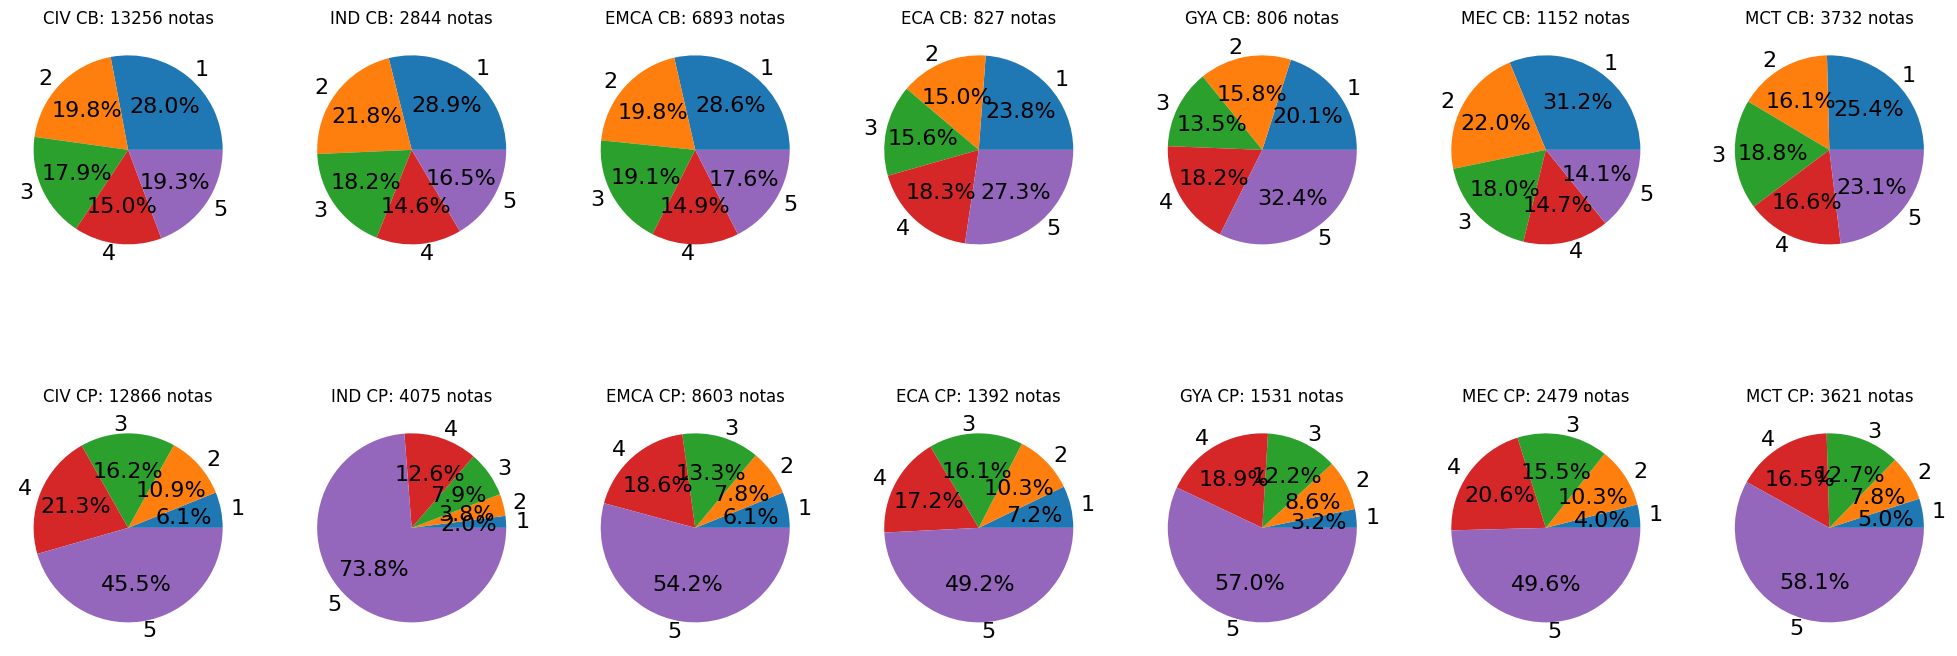

In [ ]:
plt.figure(1,figsize=[25,9])

plt.subplot(2,7,1); plt.title('CIV CB: '+str(len(notas_civ_cb))+' notas');
plt.pie(notas_civ_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,8); plt.title('CIV CP: '+str(len(notas_civ_cp))+' notas');
plt.pie(notas_civ_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,2); plt.title('IND CB: '+str(len(notas_ind_cb))+' notas');
plt.pie(notas_ind_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,9); plt.title('IND CP: '+str(len(notas_ind_cp))+' notas');
plt.pie(notas_ind_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,3); plt.title('EMCA CB: '+str(len(notas_emca_cb))+' notas');
plt.pie(notas_emca_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,10); plt.title('EMCA CP: '+str(len(notas_emca_cp))+' notas');
plt.pie(notas_emca_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,4); plt.title('ECA CB: '+str(len(notas_eca_cb))+' notas');
plt.pie(notas_eca_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,11); plt.title('ECA CP: '+str(len(notas_eca_cp))+' notas');
plt.pie(notas_eca_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,5); plt.title('GYA CB: '+str(len(notas_gya_cb))+' notas');
plt.pie(notas_gya_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,12); plt.title('GYA CP: '+str(len(notas_gya_cp))+' notas');
plt.pie(notas_gya_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,6); plt.title('MEC CB: '+str(len(notas_mec_cb))+' notas');
plt.pie(notas_mec_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,13); plt.title('MEC CP: '+str(len(notas_mec_cp))+' notas');
plt.pie(notas_mec_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.subplot(2,7,7); plt.title('MCT CB: '+str(len(notas_mct_cb))+' notas');
plt.pie(notas_mct_cb.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})
plt.subplot(2,7,14); plt.title('MCT CP: '+str(len(notas_mct_cp))+' notas');
plt.pie(notas_mct_cp.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0,textprops={'fontsize': 16})

plt.show()

# Obtenemos el promedio de calificación en cada materia y las ordenamos según esta nueva métrica (making a boxplot of the grades obtained by students in different courses of two of the most significant mayors. First ordering it by the mean grades and then ordering it by semester)

In [1]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')

df_rend = df_rend.query('Anho<2020')

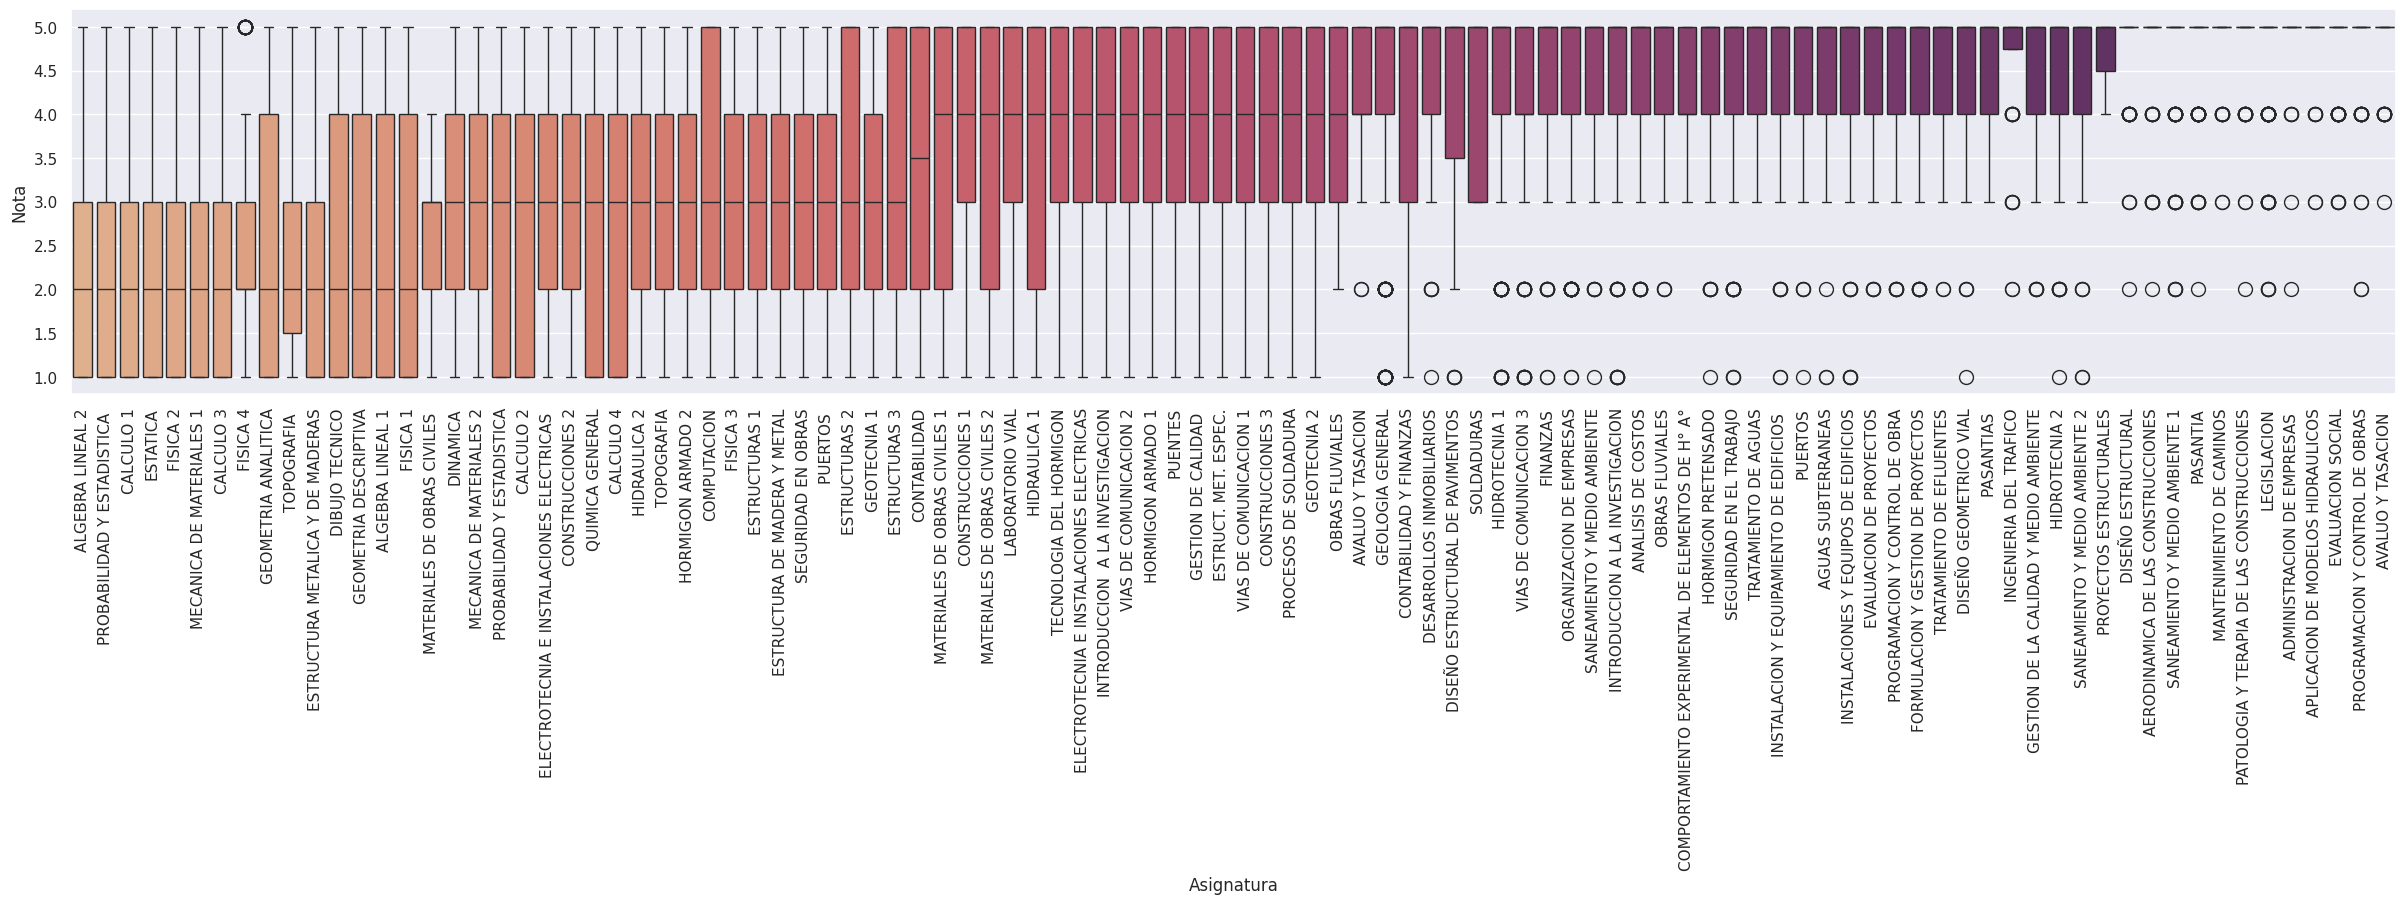

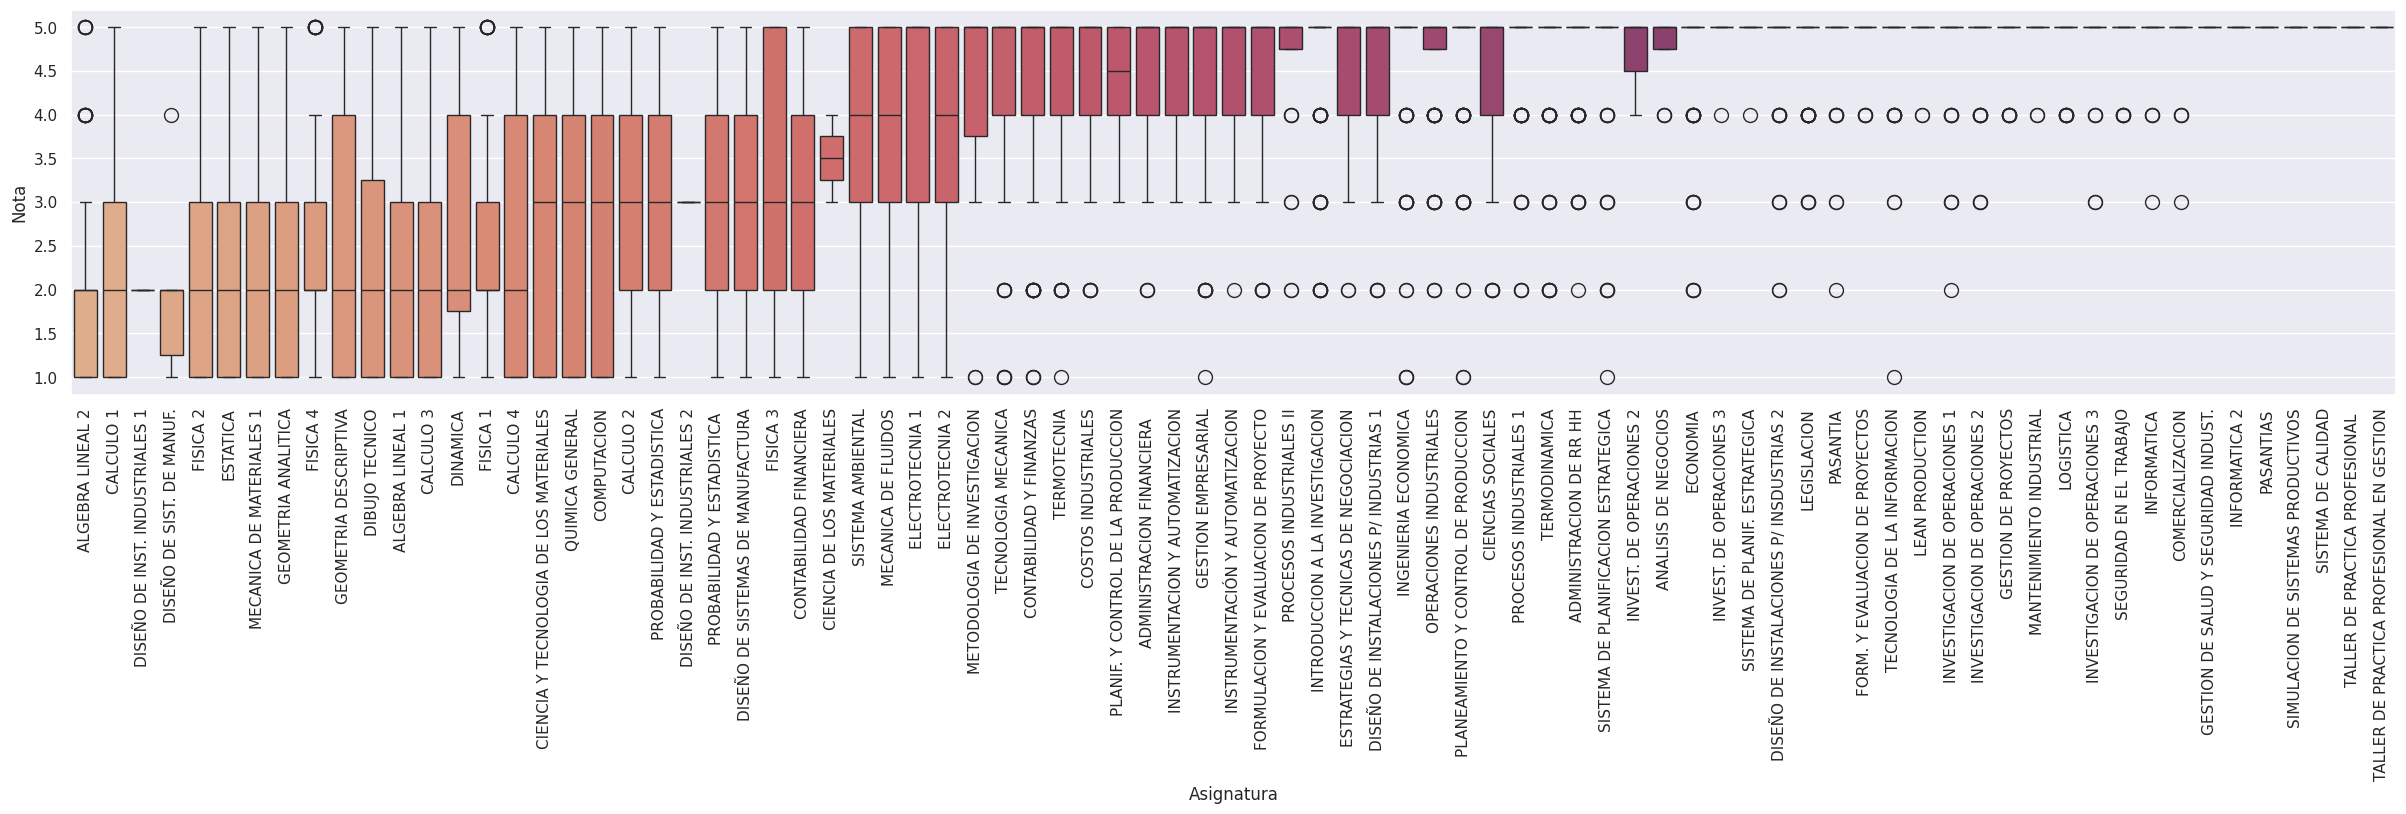


 				 ORDENADO POR SEMESTRE 



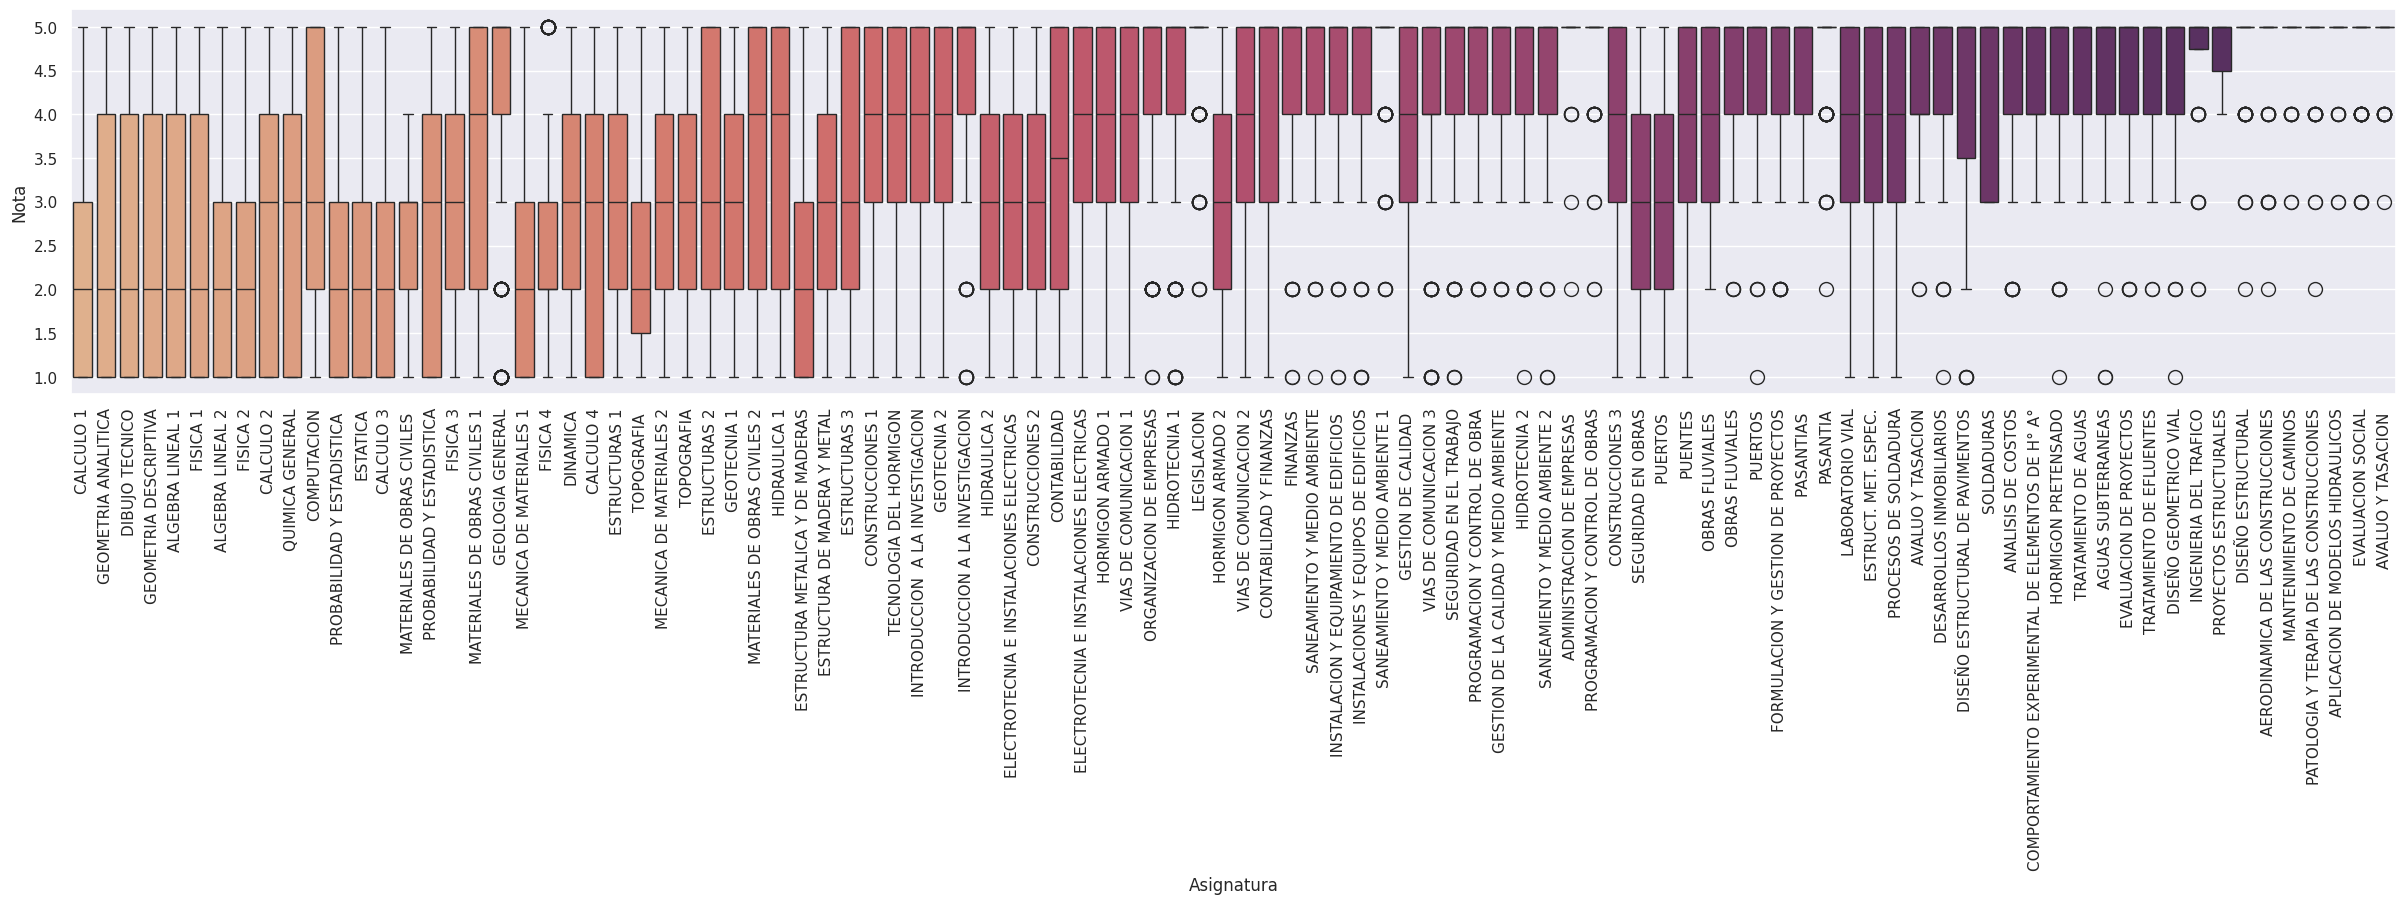

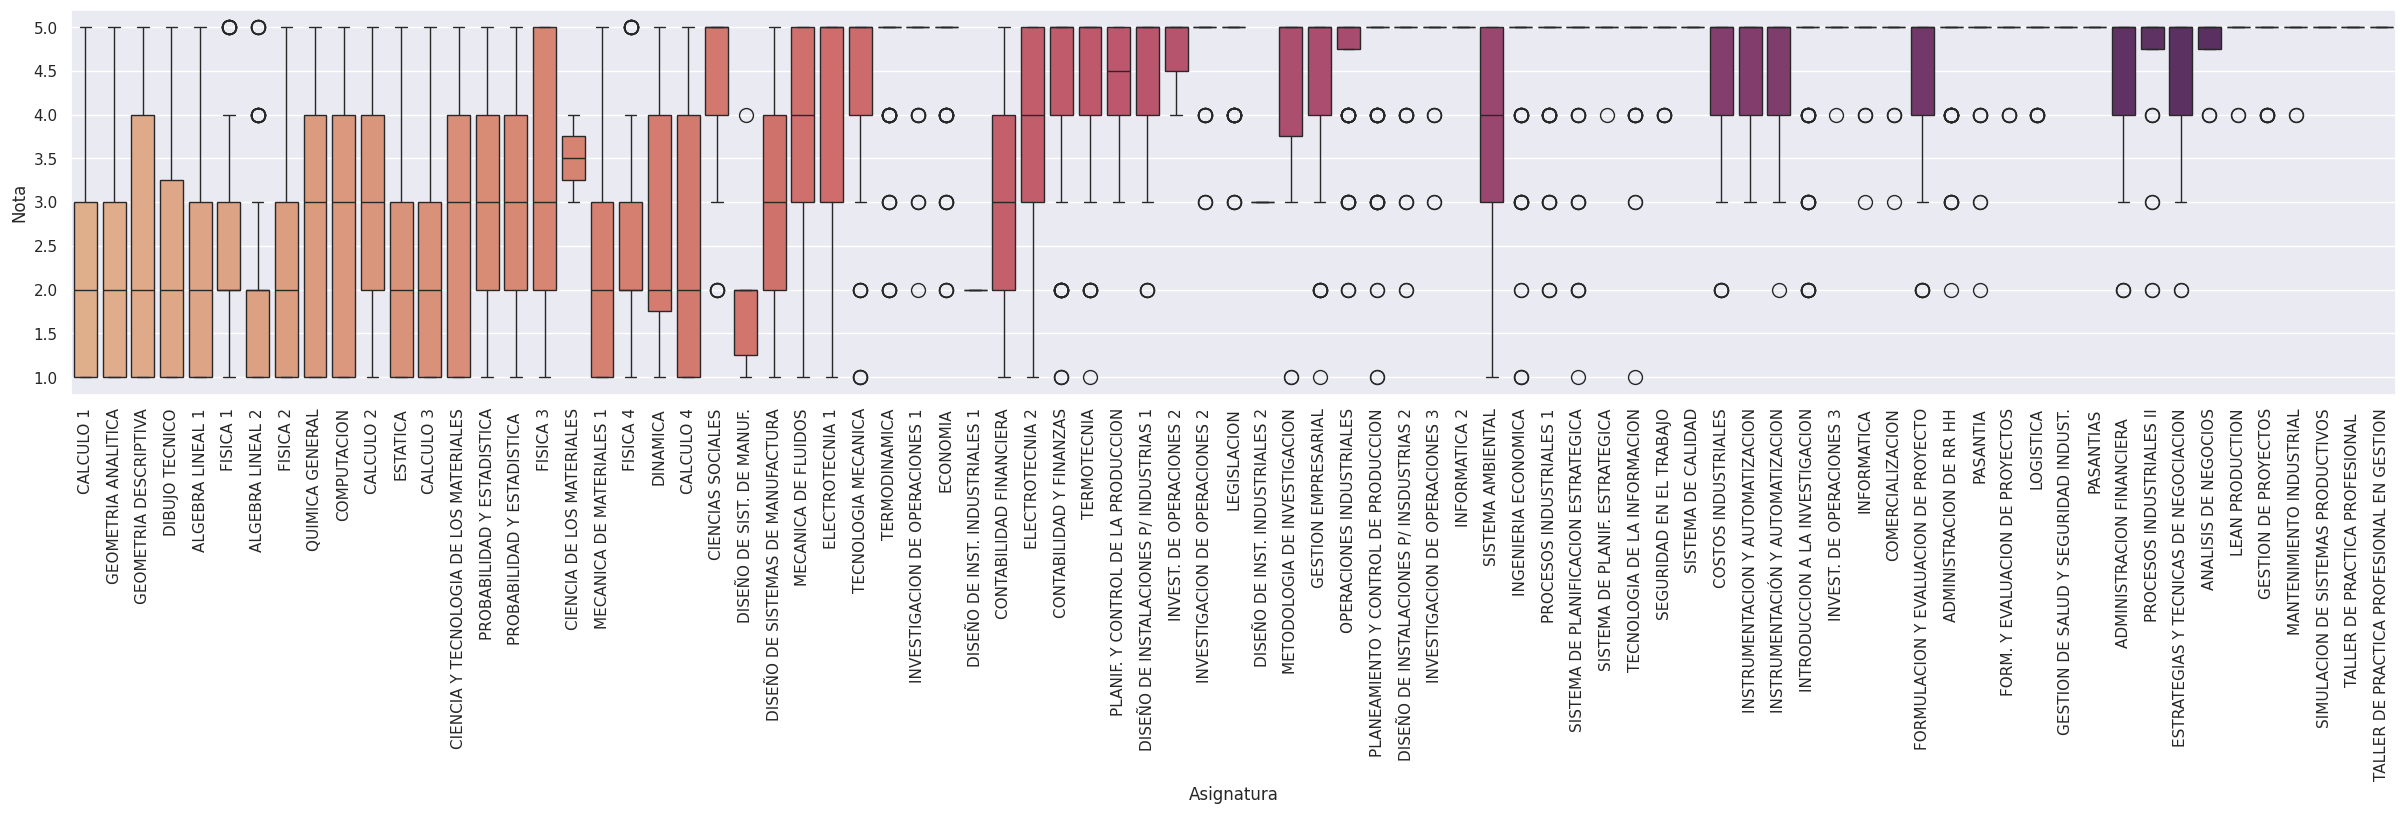

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb

reduced_df_rend= df_rend.melt(id_vars=['Asignatura','Carrera','Semestre'],value_vars=['Nota.1F','Nota.2F','Nota.3F'],var_name='Convocatoria',value_name='Nota')
col_dic= {sem: 'r' if sem < 5 else 'g' for sem in range(14)[1:]}
reduced_df_rend['Colors']= reduced_df_rend['Semestre'].apply(lambda x: col_dic[x])

new_ord= reduced_df_rend.\
                groupby(by=['Carrera','Asignatura']).\
                mean(numeric_only=True).\
                sort_values(by=['Carrera','Nota'],ascending=[True,True])
#new_ord['Colors']= reduced_df_rend.loc[new_ord.index]['Colors']

##POR CARRERA SOLAMENTE
#PARA CIVIL
sb.set(rc={'figure.figsize':(30,5)})
sb.boxplot(x='Asignatura',y='Nota',order=new_ord.loc['CIV',:].index,\
              data=reduced_df_rend.query('Carrera=="CIV"'),\
              palette="flare",\
              flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'None'}).\
              set_xticklabels(labels=new_ord.loc['CIV',:].index,rotation=90)#.\
              #set(title='Distribución de notas por materia de Ing. Civil 2016-2019')
plt.show()
print('\n')
#PARA INDUSTRIAL
sb.set(rc={'figure.figsize':(30,5)})
sb.boxplot(x='Asignatura',y='Nota',order=new_ord.loc['IND',:].index,\
              data=reduced_df_rend.query('Carrera=="IND"'),\
              palette="flare",\
              flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'None'}).\
              set_xticklabels(labels=new_ord.loc['IND',:].index,rotation=90)#.\
              #set(title='Distribución de notas por materia de Ing. Industrial 2016-2019')
plt.show()
print('\n \t\t\t\t ORDENADO POR SEMESTRE \n')

##POR CARRERA Y SEMESTRE
new_ord= reduced_df_rend.\
                groupby(by=['Carrera','Asignatura']).\
                mean(numeric_only=True).\
                sort_values(by=['Semestre','Nota'],ascending=[True,True])
#new_ord.merge(reduced_df_rend['Colors'],on=[['Carrera','Nota']],how='left')

#PARA CIVIL
sb.set(rc={'figure.figsize':(30,5)})
sb.boxplot(x='Asignatura',y='Nota',order=new_ord.loc['CIV',:].index,\
              data=reduced_df_rend.query('Carrera=="CIV"'),\
              palette="flare",\
              flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'None'}).\
              set_xticklabels(labels=new_ord.loc['CIV',:].index,rotation=90)
plt.show()
print('\n')
#PARA INDUSTRIAL
sb.set(rc={'figure.figsize':(30,5)})
sb.boxplot(x='Asignatura',y='Nota',order=new_ord.loc['IND',:].index,\
              data=reduced_df_rend.query('Carrera=="IND"'),\
              palette="flare",\
              flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'None'}).\
              set_xticklabels(labels=new_ord.loc['IND',:].index,rotation=90)
plt.show()
print('\n')

# Para analizar cuanta gente obtiene firma antes de los recuperatorios, despues de los recuperatorios y cuantos son los que aprueban la materia (an analysis of how many students reach minimum requirements for a passing grade before and after suplementary evaluations, as well as an analysis of how many actually pass)

## Primero de manera general, y entre CB y CP

In [ ]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')

In [ ]:
#No queremos lo que este desde el 2020 debido a las situaciones extraordinarias
df_rend = df_rend[df_rend['Anho']<2020]

#Mascaras de nuestro interes
mask_CB = (df_rend['Semestre']<5) #alumnos de cursos basicos
mask_CP = (df_rend['Semestre']>=5) #alumnos de cursos profesionales
mask_firma = (df_rend['1P+2P+T']>=35) #alumnos que obtienen firma durante el semestre y antes de los recuperatorios
mask_obtiene_firma = ((df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))&(~mask_firma) #alumnos que obtienen firma luego de algun recuperatorio
mask_aprueba = (df_rend['Aprobado']==1) #alumnos que aprueban en algun examen final
mask_civ  = (df_rend['Carrera']=='CIV')
mask_ind  = (df_rend['Carrera']=='IND')
mask_emca = (df_rend['Carrera']=='EMCA')
mask_eca  = (df_rend['Carrera']=='ECA')
mask_gya  = (df_rend['Carrera']=='GYA')
mask_mec  = (df_rend['Carrera']=='MEC')
mask_mct  = (df_rend['Carrera']=='MCT')

Para CB y CP juntos. Notas: 104248


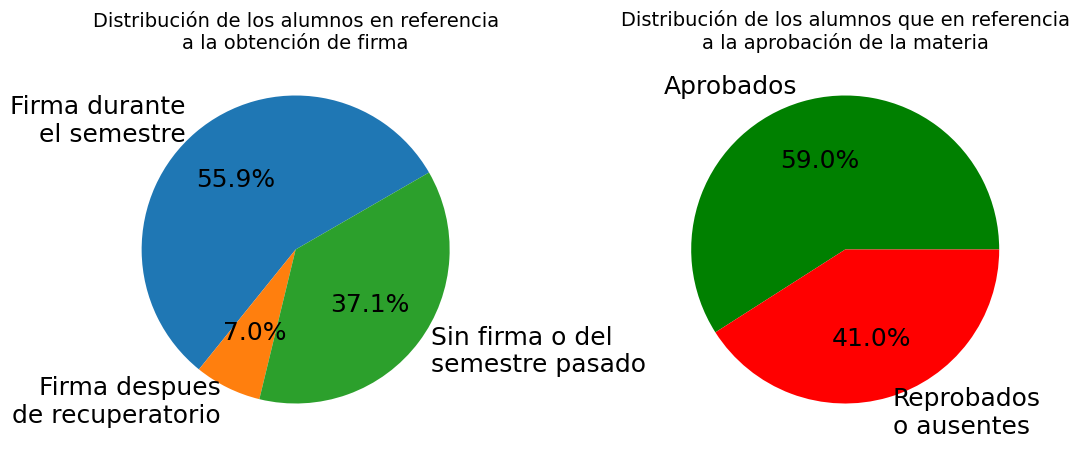

Para CB. Notas: 52461


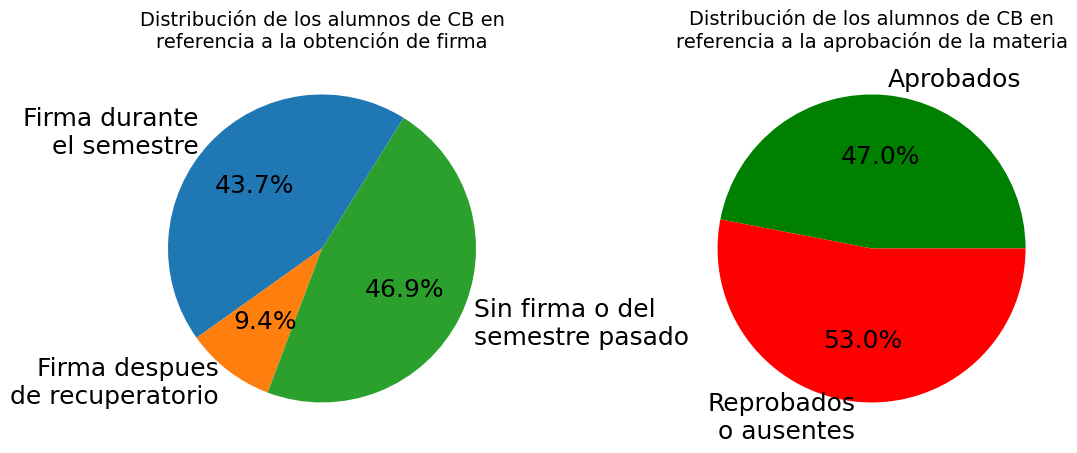

Para CP. Notas: 51787


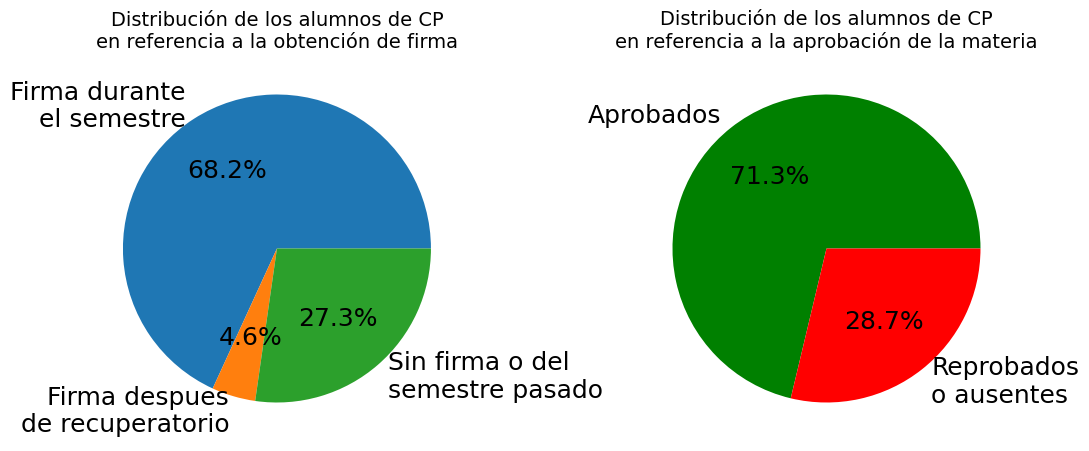

In [ ]:
#Lista de los labels para los pedazos del piechart
list_labels_1 = ['Firma durante\nel semestre','Firma despues\nde recuperatorio','Sin firma o del\nsemestre pasado']
list_labels_2 = ['Aprobados','Reprobados\no ausentes']

## PRIMERO ES EN GENERAL
print('Para CB y CP juntos. Notas:',len(df_rend))
plt.figure(1,figsize=[13,5])
plt.subplot(1,2,1)
plt.title('Distribución de los alumnos en referencia\na la obtención de firma',fontsize=14)
plt.pie([sum(mask_firma),sum(mask_obtiene_firma),sum((~mask_firma)&(~mask_obtiene_firma))],
        labels=list_labels_1,autopct='%1.1f%%',textprops={'fontsize': 18},startangle=30)
plt.subplot(1,2,2)
plt.title('Distribución de los alumnos que en referencia\na la aprobación de la materia',fontsize=14)
plt.pie([sum(mask_aprueba),sum(~mask_aprueba)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 18},colors=['g','r'])
plt.show()


## AHORA SOLO CB
print('Para CB. Notas:',sum(mask_CB))
plt.figure(2,figsize=[13,5])
plt.subplot(1,2,1)
plt.title('Distribución de los alumnos de CB en\nreferencia a la obtención de firma',fontsize=14)
plt.pie([sum((mask_firma)&(mask_CB)),sum((mask_obtiene_firma)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_CB))],
        labels=list_labels_1,autopct='%1.1f%%',textprops={'fontsize': 18},startangle=58)
plt.subplot(1,2,2)
plt.title('Distribución de los alumnos de CB en\nreferencia a la aprobación de la materia',fontsize=14)
plt.pie([sum(mask_aprueba & mask_CB),sum(~mask_aprueba & mask_CB)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 18},colors=['g','r'])
plt.show()

## AHORA SOLO CP
print('Para CP. Notas:',sum(mask_CP))
#Mascaras que son de nuestro interes
plt.figure(3,figsize=[13,5])
plt.subplot(1,2,1)
plt.title('Distribución de los alumnos de CP\nen referencia a la obtención de firma',fontsize=14)
plt.pie([sum((mask_firma)&(mask_CP)),sum((mask_obtiene_firma)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_CP))],
        labels=list_labels_1,autopct='%1.1f%%',textprops={'fontsize': 18},startangle=0)
plt.subplot(1,2,2)
plt.title('Distribución de los alumnos de CP\nen referencia a la aprobación de la materia',fontsize=14)
plt.pie([sum(mask_aprueba & mask_CP),sum(~mask_aprueba & mask_CP)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 18},colors=['g','r'])
plt.show()

## Lo mismo pero separado por carrera en CP (the same analysis but segregated into different mayors)

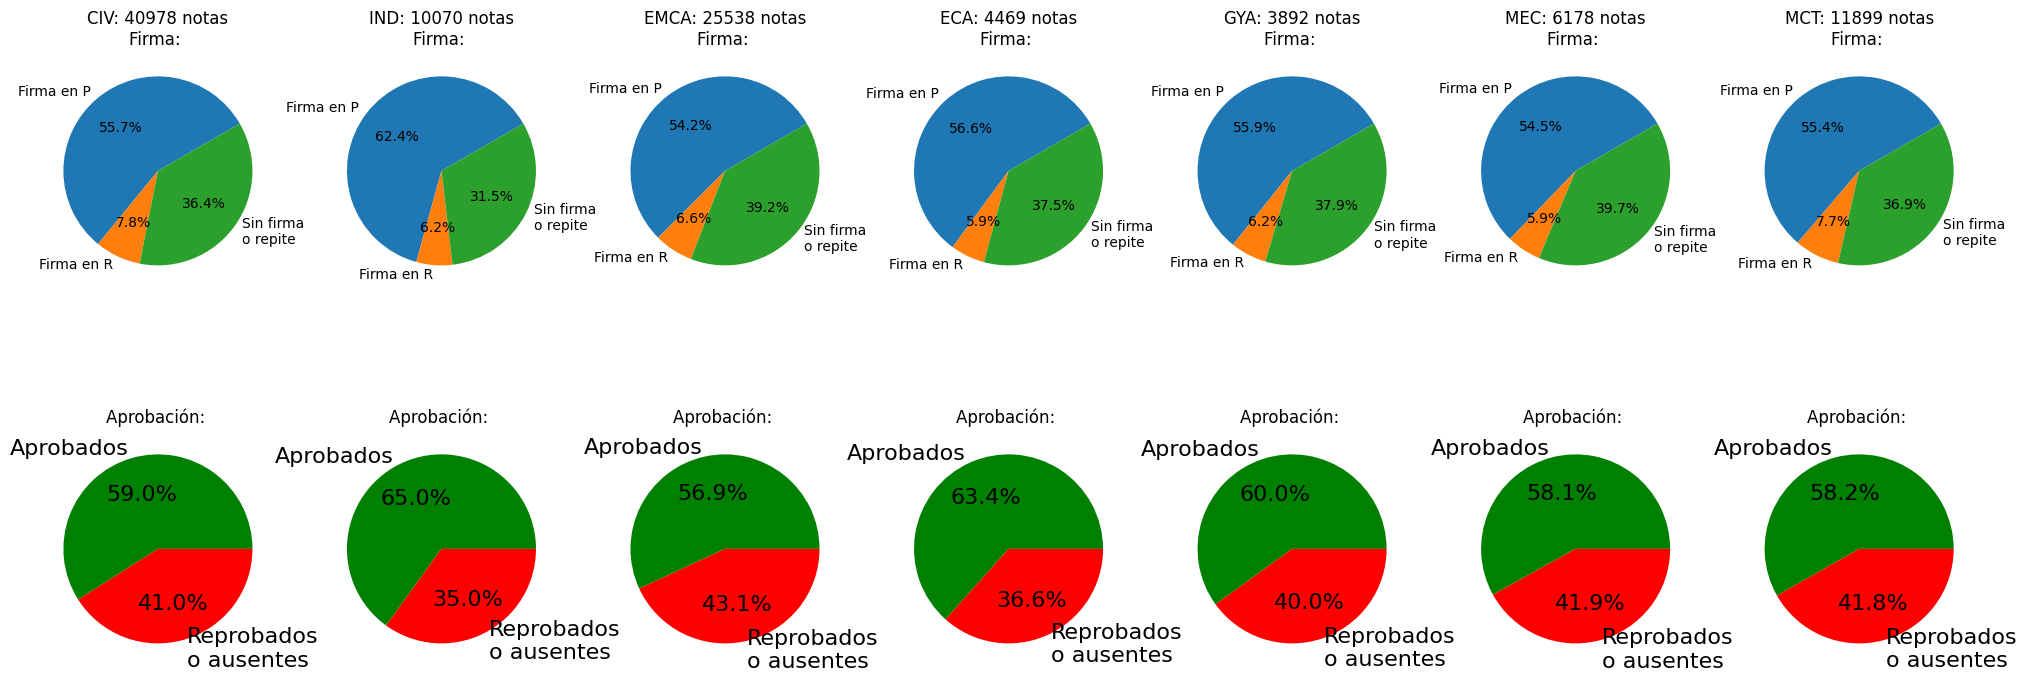

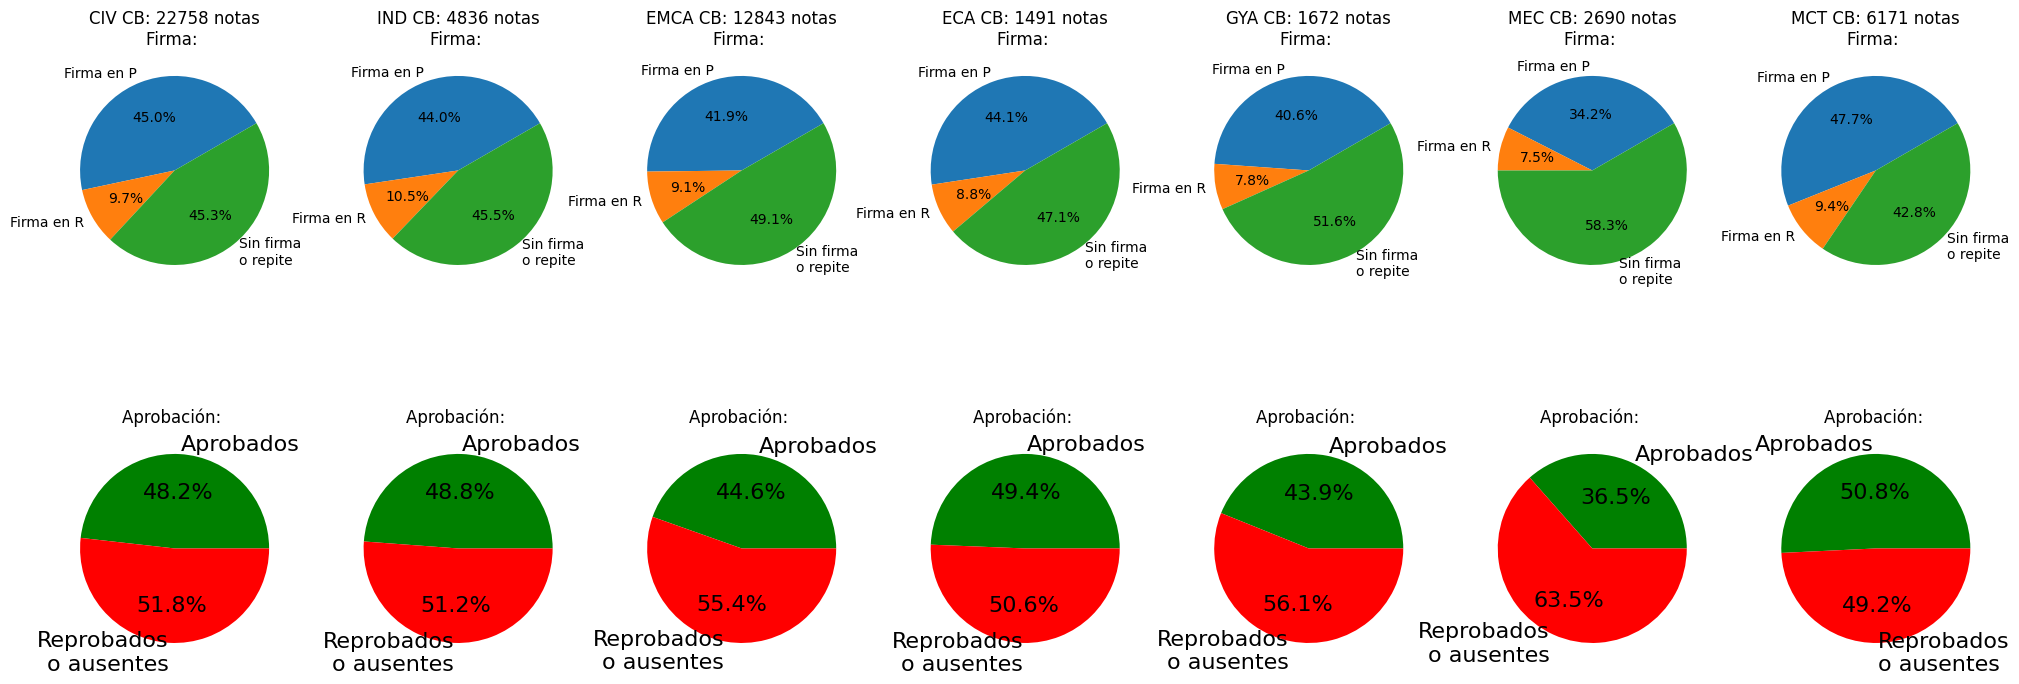

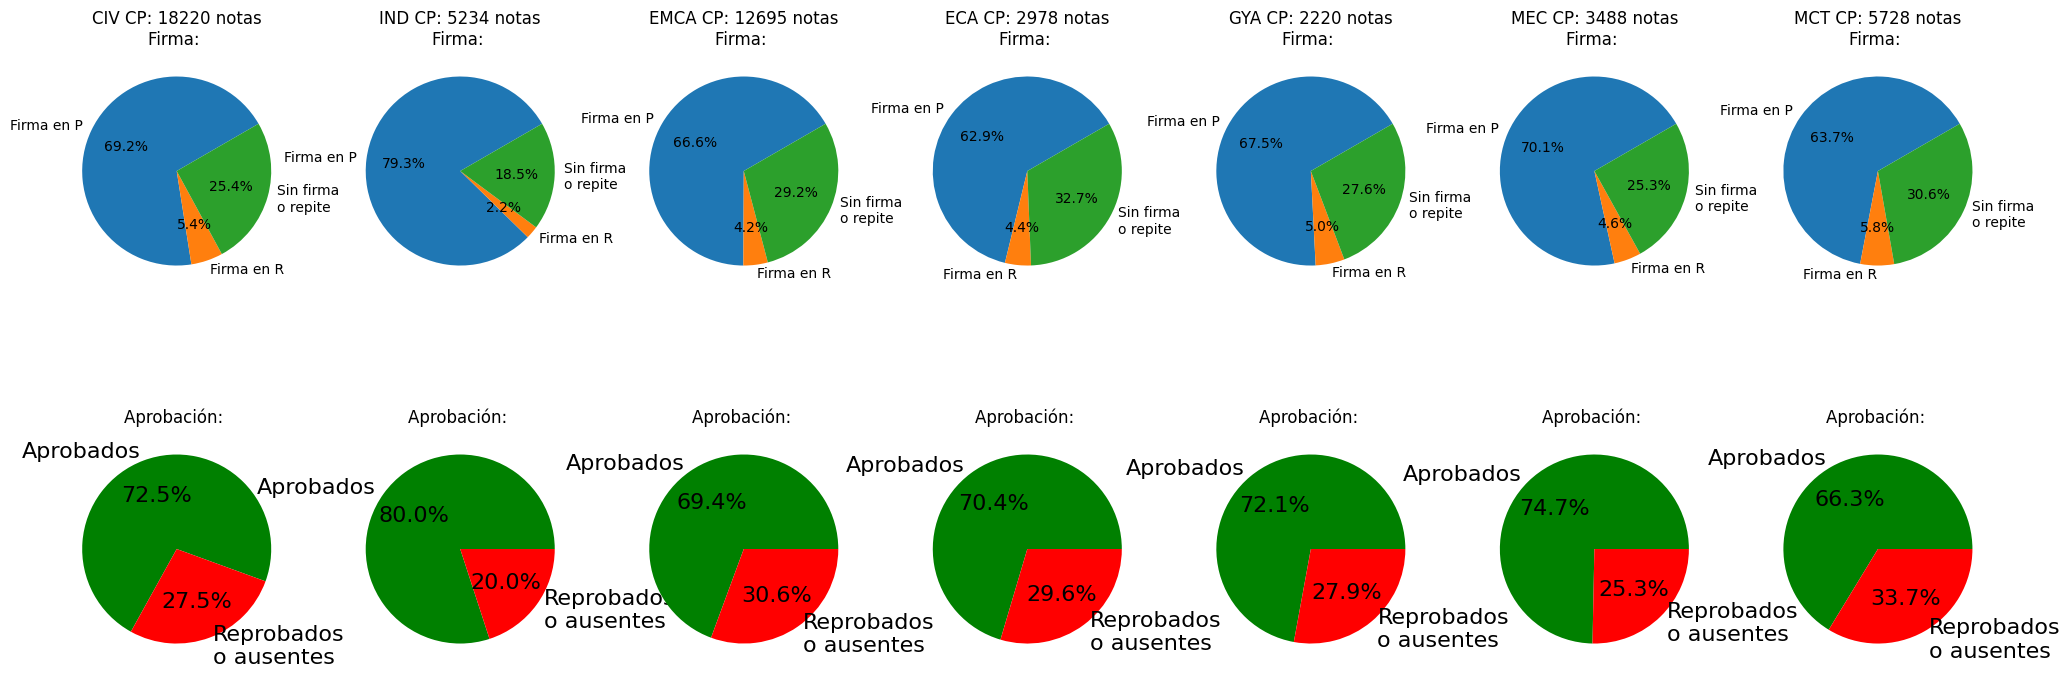

In [ ]:

#Mascaras de nuestro interes
mask_CB = (df_rend['Semestre']<5) #alumnos de cursos basicos
mask_CP = (df_rend['Semestre']>=5) #alumnos de cursos profesionales
mask_firma = (df_rend['1P+2P+T']>=35) #alumnos que obtienen firma durante el semestre y antes de los recuperatorios
mask_obtiene_firma = ((df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))&(~mask_firma) #alumnos que obtienen firma luego de algun recuperatorio
mask_aprueba = (df_rend['Aprobado']==1) #alumnos que aprueban en algun examen final
mask_civ  = (df_rend['Carrera']=='CIV')
mask_ind  = (df_rend['Carrera']=='IND')
mask_emca = (df_rend['Carrera']=='EMCA')
mask_eca  = (df_rend['Carrera']=='ECA')
mask_gya  = (df_rend['Carrera']=='GYA')
mask_mec  = (df_rend['Carrera']=='MEC')
mask_mct  = (df_rend['Carrera']=='MCT')

#Lista de los labels para los pedazos del piechart
list_labels_1 = ['Firma en P','Firma en R','Sin firma\no repite']
list_labels_2 = ['Aprobados','Reprobados\no ausentes']

########
## GL ##
########
plt.figure(1,figsize=[25,9])
plt.subplot(2,7,1); plt.title('CIV: '+ str(sum(mask_civ))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_civ)),sum((mask_obtiene_firma)&(mask_civ)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_civ))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,8); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_civ),sum(~mask_aprueba & mask_civ)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,2); plt.title('IND: '+ str(sum(mask_ind))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_ind)),sum((mask_obtiene_firma)&(mask_ind)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_ind))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,9); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_ind),sum(~mask_aprueba & mask_ind)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,3); plt.title('EMCA: '+ str(sum(mask_emca))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_emca)),sum((mask_obtiene_firma)&(mask_emca)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_emca))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,10); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_emca),sum(~mask_aprueba & mask_emca)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,4); plt.title('ECA: '+ str(sum(mask_eca))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_eca)),sum((mask_obtiene_firma)&(mask_eca)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_eca))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,11); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_eca),sum(~mask_aprueba & mask_eca)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,5); plt.title('GYA: '+ str(sum(mask_gya))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_gya)),sum((mask_obtiene_firma)&(mask_gya)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_gya))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,12); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_gya),sum(~mask_aprueba & mask_gya)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,6); plt.title('MEC: '+ str(sum(mask_mec))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mec)),sum((mask_obtiene_firma)&(mask_mec)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mec))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,13); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_mec),sum(~mask_aprueba & mask_mec)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,7); plt.title('MCT: '+ str(sum(mask_mct))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mct)),sum((mask_obtiene_firma)&(mask_mct)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mct))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,14); plt.title('Aprobación: ');
plt.pie([sum(mask_aprueba & mask_mct),sum(~mask_aprueba & mask_mct)],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.show()
########
## CB ##
########
print('\n')
plt.figure(2,figsize=[25,9])
plt.subplot(2,7,1); plt.title('CIV CB: '+ str(sum(mask_civ & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_civ)&(mask_CB)),sum((mask_obtiene_firma)&(mask_civ)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_civ)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,8); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_civ)&(mask_CB)),sum((~mask_aprueba)&(mask_civ)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,2); plt.title('IND CB: '+ str(sum(mask_ind & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_ind)&(mask_CB)),sum((mask_obtiene_firma)&(mask_ind)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_ind)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,9); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_ind)&(mask_CB)),sum((~mask_aprueba)&(mask_ind)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,3); plt.title('EMCA CB: '+ str(sum(mask_emca & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_emca)&(mask_CB)),sum((mask_obtiene_firma)&(mask_emca)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_emca)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,10); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_emca)&(mask_CB)),sum((~mask_aprueba)&(mask_emca)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,4); plt.title('ECA CB: '+ str(sum(mask_eca & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_eca)&(mask_CB)),sum((mask_obtiene_firma)&(mask_eca)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_eca)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,11); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_eca)&(mask_CB)),sum((~mask_aprueba)&(mask_eca)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,5); plt.title('GYA CB: '+ str(sum(mask_gya & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_gya)&(mask_CB)),sum((mask_obtiene_firma)&(mask_gya)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_gya)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,12); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_gya)&(mask_CB)),sum((~mask_aprueba)&(mask_gya)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,6); plt.title('MEC CB: '+ str(sum(mask_mec & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mec)&(mask_CB)),sum((mask_obtiene_firma)&(mask_mec)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mec)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,13); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_mec)&(mask_CB)),sum((~mask_aprueba)&(mask_mec)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,7); plt.title('MCT CB: '+ str(sum(mask_mct & mask_CB))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mct)&(mask_CB)),sum((mask_obtiene_firma)&(mask_mct)&(mask_CB)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mct)&(mask_CB))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,14); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_mct)&(mask_CB)),sum((~mask_aprueba)&(mask_mct)&(mask_CB))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.show()
########
## CP ##
########
print('\n')
plt.figure(3,figsize=[25,9])

plt.subplot(2,7,1); plt.title('CIV CP: '+ str(sum(mask_civ & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_civ)&(mask_CP)),sum((mask_obtiene_firma)&(mask_civ)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_civ)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,8); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_civ)&(mask_CP)),sum((~mask_aprueba)&(mask_civ)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'],startangle=-20)

plt.subplot(2,7,2); plt.title('IND CP: '+ str(sum(mask_ind & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_ind)&(mask_CP)),sum((mask_obtiene_firma)&(mask_ind)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_ind)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,9); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_ind)&(mask_CP)),sum((~mask_aprueba)&(mask_ind)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,3); plt.title('EMCA CP: '+ str(sum(mask_emca & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_emca)&(mask_CP)),sum((mask_obtiene_firma)&(mask_emca)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_emca)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,10); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_emca)&(mask_CP)),sum((~mask_aprueba)&(mask_emca)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,4); plt.title('ECA CP: '+ str(sum(mask_eca & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_eca)&(mask_CP)),sum((mask_obtiene_firma)&(mask_eca)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_eca)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,11); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_eca)&(mask_CP)),sum((~mask_aprueba)&(mask_eca)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,5); plt.title('GYA CP: '+ str(sum(mask_gya & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_gya)&(mask_CP)),sum((mask_obtiene_firma)&(mask_gya)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_gya)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,12); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_gya)&(mask_CP)),sum((~mask_aprueba)&(mask_gya)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,6); plt.title('MEC CP: '+ str(sum(mask_mec & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mec)&(mask_CP)),sum((mask_obtiene_firma)&(mask_mec)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mec)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,13); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_mec)&(mask_CP)),sum((~mask_aprueba)&(mask_mec)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.subplot(2,7,7); plt.title('MCT CP: '+ str(sum(mask_mct & mask_CP))+' notas\nFirma: ');
plt.pie([sum((mask_firma)&(mask_mct)&(mask_CP)),sum((mask_obtiene_firma)&(mask_mct)&(mask_CP)),sum((~mask_firma)&(~mask_obtiene_firma)&(mask_mct)&(mask_CP))],labels=list_labels_1,autopct='%1.1f%%',startangle=30)
plt.subplot(2,7,14); plt.title('Aprobación: ');
plt.pie([sum((mask_aprueba)&(mask_mct)&(mask_CP)),sum((~mask_aprueba)&(mask_mct)&(mask_CP))],
        labels=list_labels_2,autopct='%1.1f%%',textprops={'fontsize': 16},colors=['g','r'])

plt.show()

# Para analizar la cantidad de gente que va a exonerar y que no va a exonerar (given the new passing requirements, this would be an analysis of the proportion of students that would pass without having to take a final test)


In [ ]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')

In [ ]:
#No queremos lo que este desde el 2020 debido a las situaciones extraordinarias
df_rend = df_rend[df_rend['Anho']<2020]

#Mascaras de nuestro interes
mask_CB = (df_rend['Semestre']<5) #alumnos de cursos basicos
mask_CP = (df_rend['Semestre']>=5) #alumnos de cursos profesionales
mask_firma = (df_rend['1P+2P+T']>=35) #alumnos que obtienen firma durante el semestre y antes de los recuperatorios
mask_obtiene_firma = ((df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))&(~mask_firma) #alumnos que obtienen firma luego de algun recuperatorio
mask_aprueba = (df_rend['Aprobado']==1) #alumnos que aprueban en algun examen final
#Lista de los labels para los pedazos del piechart
list_labels_1 = ['Firma durante\nel semestre','Firma despues\nde recuperatorio','Sin firma o del\nsemestre pasado']
list_labels_2 = ['Aprobados','Reprobados\no ausentes']

#Solo se va a analizar a las personas que consiguen firma en ese semestre, las demas se obvian
mask_sin_exoneracion = (df_rend['1P+2P+T']>=35)&(df_rend['1P+2P+T']<50)
mask_exonera_3 = (df_rend['1P+2P+T']>=50)&(df_rend['1P+2P+T']<57)
mask_exonera_4 = (df_rend['1P+2P+T']>=57)&(df_rend['1P+2P+T']<64)
mask_exonera_5 = df_rend['1P+2P+T']>=64

Resultados en total desde 2016 hasta 2019 y por separado: 
Cantidad de notas:  104248
Cantidad con firma:  58238
Cantidad obtienen firma:  7313
Cantidad de exonerados con 3:  12978
Cantidad de exonerados con 4:  9758
Cantidad de exonerados con 5:  4941


Todos  \
Tipo de dato                                       Separacion                 
Porcentaje de personas que pueden rendir final:    General            55.86   
                                                   Cursos Basicos     43.74   
                                                   Curso Profesional  68.15   
Porcentaje de habilitados a final que no exoneran: General            52.48   
                                                   Cursos Basicos     70.44   
                                                   Curso Profesional  40.80   
Porcentaje de habilitados que exoneran con 3:      General            22.28   
                                                   Cursos Basicos     17.61   
                                                   Curso Profesional  25.33   
Porcentaje de habilitados que exoneran con 4:      General            16.76   
                                                   Cursos Basicos      9.13   
                                                   Curso Profesional  21.72   
Porcentaje de habilitados que exoneran con 5:      General             8.48   
                                                   Cursos Basicos      2.83   
                                                   Curso Profesional  12.16   

                                                                       2016  \
Tipo de dato                                       Separacion                 
Porcentaje de personas que pueden rendir final:    General            61.10   
                                                   Cursos Basicos     50.73   
                                                   Curso Profesional  69.99   
Porcentaje de habilitados a final que no exoneran: General            49.93   
                                                   Cursos Basicos     64.24   
                                                   Curso Profesional  41.04   
Porcentaje de habilitados que exoneran con 3:      General            23.19   
                                                   Cursos Basicos     20.23   
                                                   Curso Profesional  25.03   
Porcentaje de habilitados que exoneran con 4:      General            18.05   
                                                   Cursos Basicos     11.97   
                                                   Curso Profesional  21.83   
Porcentaje de habilitados que exoneran con 5:      General             8.83   
                                                   Cursos Basicos      3.56   
                                                   Curso Profesional  12.11   

                                                                       2017  \
Tipo de dato                                       Separacion                 
Porcentaje de personas que pueden rendir final:    General            58.07   
                                                   Cursos Basicos     47.02   
                                                   Curso Profesional  67.66   
Porcentaje de habilitados a final que no exoneran: General            51.91   
                                                   Cursos Basicos     69.95   
                                                   Curso Profesional  41.02   
Porcentaje de habilitados que exoneran con 3:      General            22.29   
                                                   Cursos Basicos     18.28   
                                                   Curso Profesional  24.70   
Porcentaje de habilitados que exoneran con 4:      General            16.79   
                                                   Cursos Basicos      8.96   
                                                   Curso Profesional  21.52   
Porcentaje de habilitados que exoneran con 5:      General             9.02   
                                                   Cursos Basicos      2.81   
                                                   Curso Profesional  12.76   

                                      

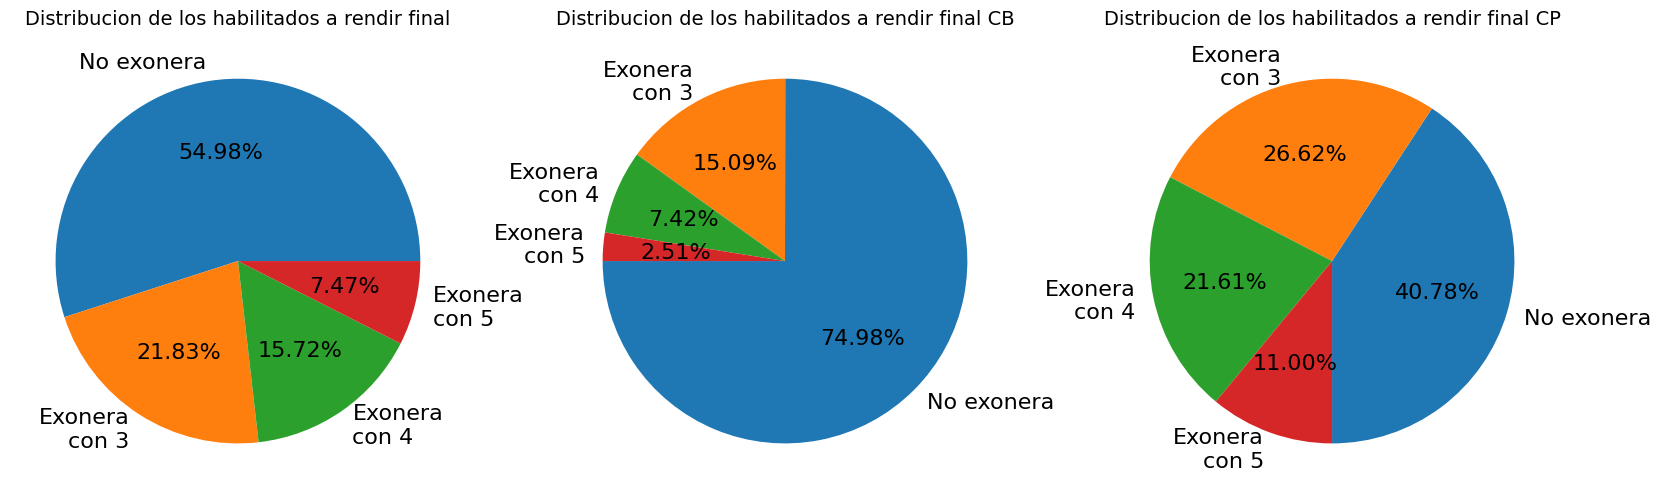

In [ ]:
#Dataframe con los resultados de 2016 a 2019

g_habilitados   = round(len(df_rend[mask_firma])/len(df_rend)*100,2)
g_sin_ex        = round(len(df_rend[mask_sin_exoneracion])/len(df_rend[mask_firma])*100,2)
g_ex_3          = round(len(df_rend[mask_exonera_3])/len(df_rend[mask_firma])*100,2)
g_ex_4          = round(len(df_rend[mask_exonera_4])/len(df_rend[mask_firma])*100,2)
g_ex_5          = round(len(df_rend[mask_exonera_5])/len(df_rend[mask_firma])*100,2)

cb_habilitados  = round(len(df_rend[mask_firma & mask_CB])/len(df_rend[mask_CB])*100,2)
cb_sin_ex       = round(len(df_rend[mask_sin_exoneracion & mask_CB])/len(df_rend[mask_firma & mask_CB])*100,2)
cb_ex_3         = round(len(df_rend[mask_exonera_3 & mask_CB])/len(df_rend[mask_firma & mask_CB])*100,2)
cb_ex_4         = round(len(df_rend[mask_exonera_4 & mask_CB])/len(df_rend[mask_firma & mask_CB])*100,2)
cb_ex_5         = round(len(df_rend[mask_exonera_5 & mask_CB])/len(df_rend[mask_firma & mask_CB])*100,2)

cp_habilitados  = round(len(df_rend[mask_firma & mask_CP])/len(df_rend[mask_CP])*100,2)
cp_sin_ex       = round(len(df_rend[mask_sin_exoneracion & mask_CP])/len(df_rend[mask_firma & mask_CP])*100,2)
cp_ex_3         = round(len(df_rend[mask_exonera_3 & mask_CP])/len(df_rend[mask_firma & mask_CP])*100,2)
cp_ex_4         = round(len(df_rend[mask_exonera_4 & mask_CP])/len(df_rend[mask_firma & mask_CP])*100,2)
cp_ex_5         = round(len(df_rend[mask_exonera_5 & mask_CP])/len(df_rend[mask_firma & mask_CP])*100,2)


resultados = pd.DataFrame([['Porcentaje de personas que pueden rendir final:','General'                ,g_habilitados],
                           ['Porcentaje de personas que pueden rendir final:','Cursos Basicos'         ,cb_habilitados],
                           ['Porcentaje de personas que pueden rendir final:','Curso Profesional'      ,cp_habilitados],
                           ['Porcentaje de habilitados a final que no exoneran:','General'             ,g_sin_ex],
                           ['Porcentaje de habilitados a final que no exoneran:','Cursos Basicos'      ,cb_sin_ex],
                           ['Porcentaje de habilitados a final que no exoneran:','Curso Profesional'   ,cp_sin_ex],
                           ['Porcentaje de habilitados que exoneran con 3:','General'                   ,g_ex_3],
                           ['Porcentaje de habilitados que exoneran con 3:','Cursos Basicos'            ,cb_ex_3],
                           ['Porcentaje de habilitados que exoneran con 3:','Curso Profesional'         ,cp_ex_3],
                           ['Porcentaje de habilitados que exoneran con 4:','General'                   ,g_ex_4],
                           ['Porcentaje de habilitados que exoneran con 4:','Cursos Basicos'            ,cb_ex_4],
                           ['Porcentaje de habilitados que exoneran con 4:','Curso Profesional'         ,cp_ex_4],
                           ['Porcentaje de habilitados que exoneran con 5:','General'                   ,g_ex_5],
                           ['Porcentaje de habilitados que exoneran con 5:','Cursos Basicos'            ,cb_ex_5],
                           ['Porcentaje de habilitados que exoneran con 5:','Curso Profesional'         ,cp_ex_5]
                           ],columns=['Tipo de dato','Separacion','Todos'])

#Dataframe con los resultados por anho

for a in sorted(df_rend['Anho'].unique()):
  mask_un_anho    = df_rend['Anho'] == a

  g_habilitados   = round(len(df_rend[mask_firma & mask_un_anho])/len(df_rend[mask_un_anho])*100,2)
  g_sin_ex        = round(len(df_rend[mask_sin_exoneracion & mask_un_anho])/len(df_rend[mask_firma & mask_un_anho])*100,2)
  g_ex_3          = round(len(df_rend[mask_exonera_3 & mask_un_anho])/len(df_rend[mask_firma & mask_un_anho])*100,2)
  g_ex_4          = round(len(df_rend[mask_exonera_4 & mask_un_anho])/len(df_rend[mask_firma & mask_un_anho])*100,2)
  g_ex_5          = round(len(df_rend[mask_exonera_5 & mask_un_anho])/len(df_rend[mask_firma & mask_un_anho])*100,2)

  cb_habilitados  = round(len(df_rend[mask_firma & mask_CB & mask_un_anho])/len(df_rend[mask_CB & mask_un_anho])*100,2)
  cb_sin_ex       = round(len(df_rend[mask_sin_exoneracion & mask_CB & mask_un_anho])/len(df_rend[mask_firma & mask_CB & mask_un_anho])*100,2)
  cb_ex_3         = round(len(df_rend[mask_exonera_3 & mask_CB & mask_un_anho])/len(df_rend[mask_firma & mask_CB & mask_un_anho])*100,2)
  cb_ex_4         = round(len(df_rend[mask_exonera_4 & mask_CB & mask_un_anho])/len(df_rend[mask_firma & mask_CB & mask_un_anho])*100,2)
  cb_ex_5         = round(len(df_rend[mask_exonera_5 & mask_CB & mask_un_anho])/len(df_rend[mask_firma & mask_CB & mask_un_anho])*100,2)

  cp_habilitados  = round(len(df_rend[mask_firma & mask_CP & mask_un_anho])/len(df_rend[mask_CP & mask_un_anho])*100,2)
  cp_sin_ex       = round(len(df_rend[mask_sin_exoneracion & mask_CP & mask_un_anho])/len(df_rend[mask_firma & mask_CP & mask_un_anho])*100,2)
  cp_ex_3         = round(len(df_rend[mask_exonera_3 & mask_CP & mask_un_anho])/len(df_rend[mask_firma & mask_CP & mask_un_anho])*100,2)
  cp_ex_4         = round(len(df_rend[mask_exonera_4 & mask_CP & mask_un_anho])/len(df_rend[mask_firma & mask_CP & mask_un_anho])*100,2)
  cp_ex_5         = round(len(df_rend[mask_exonera_5 & mask_CP & mask_un_anho])/len(df_rend[mask_firma & mask_CP & mask_un_anho])*100,2)

  resultados[a]   = [g_habilitados,cb_habilitados,cp_habilitados,g_sin_ex,cb_sin_ex,cp_sin_ex,g_ex_3,cb_ex_3,cp_ex_3,g_ex_4,cb_ex_4,cp_ex_4,g_ex_5,cb_ex_5,cp_ex_5]

resultados.set_index(['Tipo de dato','Separacion'],inplace=True)


print('Resultados en total desde 2016 hasta 2019 y por separado: ')
print('Cantidad de notas: ', len(df_rend))
print('Cantidad con firma: ',len(df_rend[mask_firma]))
print('Cantidad obtienen firma: ',len(df_rend[mask_obtiene_firma]))
print('Cantidad de exonerados con 3: ',len(df_rend[mask_exonera_3]))
print('Cantidad de exonerados con 4: ',len(df_rend[mask_exonera_4]))
print('Cantidad de exonerados con 5: ',len(df_rend[mask_exonera_5]))

display(resultados)

#plt.title('Porcentaje de personas que pueden rendir final')
#plt.plot(resultados[[2016,2017,2018,2019]].loc['Porcentaje de personas que pueden rendir final:','General'],label='G',color='r')
#plt.plot(resultados[[2016,2017,2018,2019]].loc['Porcentaje de personas que pueden rendir final:','Cursos Basicos'],label='CB',color='b')
#plt.plot(resultados[[2016,2017,2018,2019]].loc['Porcentaje de personas que pueden rendir final:','Curso Profesional'],label='CP',color='g')
#plt.legend()

#Lista de los labels para los pedazos del piechart
list_labels_1 = ['No exonera','Exonera\ncon 3','Exonera\ncon 4','Exonera\ncon 5']

plt.figure(1,figsize=[20,9])
plt.subplot(1,3,1)
plt.title('Distribucion de los habilitados a rendir final',fontsize=14);
plt.pie([g_sin_ex,g_ex_3,g_ex_4,g_ex_5],labels=list_labels_1,autopct='%1.2f%%',textprops={'fontsize': 16},startangle=0)
plt.subplot(1,3,2)
plt.title('Distribucion de los habilitados a rendir final CB',fontsize=14);
plt.pie([cb_sin_ex,cb_ex_3,cb_ex_4,cb_ex_5],labels=list_labels_1,autopct='%1.2f%%',textprops={'fontsize': 16},startangle=180)
plt.subplot(1,3,3)
plt.title('Distribucion de los habilitados a rendir final CP',fontsize=14);
plt.pie([cp_sin_ex,cp_ex_3,cp_ex_4,cp_ex_5],labels=list_labels_1,autopct='%1.2f%%',textprops={'fontsize': 16},startangle=-90)

plt.show()


# Hacemos lo mismo con las notas estimadas utilizando la propuesta de direccion academica.

In [ ]:
notas_civ_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_civ_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_ind_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_ind_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_emca_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_emca_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_eca_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_eca_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_gya_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])


notas_gya_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mec_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mec_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mct_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mct_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

NameError: ignored

In [ ]:
notas_civ_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_civ_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_civ].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_ind_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_ind_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_ind].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_emca_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_emca_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_emca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_eca_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_eca_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_eca].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_gya_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])


notas_gya_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_gya].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mec_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mec_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_mec].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mct_cb_da = pd.concat([
    df_rend[mask_1F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

notas_mct_cp_da = pd.concat([
    df_rend[mask_1F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP & mask_mct].apply(lambda x: obtener_nota(abaco_DA, False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

In [ ]:
plt.figure(1,figsize=[25,9])

plt.subplot(2,7,1); plt.title('CIV CB: '+str(len(notas_civ_cb_da))+' notas');
plt.pie(notas_civ_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,8); plt.title('CIV CP: '+str(len(notas_civ_cp_da))+' notas');
plt.pie(notas_civ_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,2); plt.title('IND CB: '+str(len(notas_ind_cb_da))+' notas');
plt.pie(notas_ind_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,9); plt.title('IND CP: '+str(len(notas_ind_cp_da))+' notas');
plt.pie(notas_ind_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,3); plt.title('EMCA CB: '+str(len(notas_emca_cb_da))+' notas');
plt.pie(notas_emca_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,10); plt.title('EMCA CP: '+str(len(notas_emca_cp_da))+' notas');
plt.pie(notas_emca_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,4); plt.title('ECA CB: '+str(len(notas_eca_cb_da))+' notas');
plt.pie(notas_eca_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,11); plt.title('ECA CP: '+str(len(notas_eca_cp_da))+' notas');
plt.pie(notas_eca_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,5); plt.title('GYA CB: '+str(len(notas_gya_cb_da))+' notas');
plt.pie(notas_gya_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,12); plt.title('GYA CP: '+str(len(notas_gya_cp_da))+' notas');
plt.pie(notas_gya_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,6); plt.title('MEC CB: '+str(len(notas_mec_cb_da))+' notas');
plt.pie(notas_mec_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,13); plt.title('MEC CP: '+str(len(notas_mec_cp_da))+' notas');
plt.pie(notas_mec_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.subplot(2,7,7); plt.title('MCT CB: '+str(len(notas_mct_cb_da))+' notas');
plt.pie(notas_mct_cb_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.subplot(2,7,14); plt.title('MCT CP: '+str(len(notas_mct_cp_da))+' notas');
plt.pie(notas_mct_cp_da.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

plt.show()

NameError: ignored

# Para analizar la distribucion de notas actual y la distribucion de notas que se espera con el cambio de reglamento sin tener en cuenta un cambio significativo en el esquema evaluativo (proceso 70pts, final 30pts).
1) Solo se considera a las personas que hayan conseguido firma antes del recuperatorio.

2) Se considera el escenario con y sin exoneracion.

3) No se considera que el tercer final no aparece en el nuevo reglamento.

4) No se considera cualquier firma obtenida durante examenes recuperatorios.

5) Se cree que la discrepancia entre las notas actuales reales y estimadas se debe a las firmas mejoradas en examenes recuperatorios y a los puntajes mejorados en revisiones.

In [ ]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')


In [ ]:
#No queremos lo que este desde el 2020 debido a las situaciones extraordinarias
df_rend = df_rend[df_rend['Anho']<2020]

#Alumnos de cursos basicos
mask_CB = (df_rend['Semestre']<5)
mask_CP = (df_rend['Semestre']>=5)

#Solo vamos a considerar a las personas sin firma anterior, que alcanzan firma para rendir alguno de los finales y que tienen el puntaje obtenido registrado

#mask_1F = (~np.isnan(df_rend['P1F']))&(df_rend['Anho']==df_rend['Firma.Anho'])&((df_rend['1P+2P+T']>=35))
#mask_2F = (~np.isnan(df_rend['P2F']))&(df_rend['Anho']==df_rend['Firma.Anho'])&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35))
#mask_3F = (~np.isnan(df_rend['P3F']))&(df_rend['Anho']==df_rend['Firma.Anho'])&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))

mask_1F = (~np.isnan(df_rend['P1F']))&((df_rend['1P+2P+T']>=35))
mask_2F = (~np.isnan(df_rend['P2F']))&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35))
mask_3F = (~np.isnan(df_rend['P3F']))&((df_rend['1P+2P+T']>=35)|(df_rend['1R+T']>=35)|(df_rend['2R+T']>=35))

Notas actuales
1.0     9990
2.0     8766
3.0    10229
4.0    11102
5.0    24583
dtype: int64 64670
1    11178
2     8470
3    10155
4    10926
5    23941
dtype: int64 64670


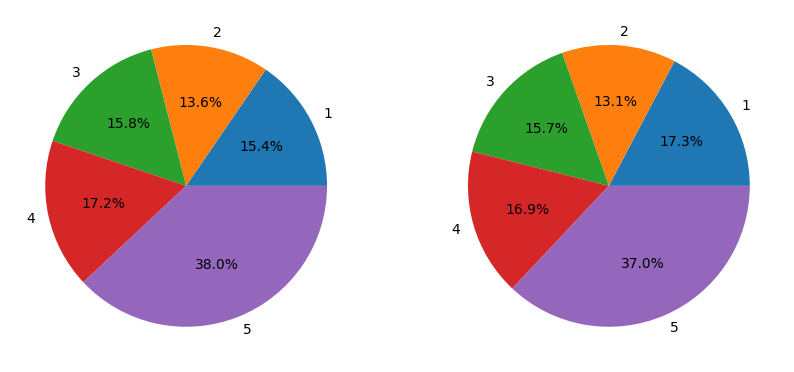

DA sin y con exoneracion
1    13603
2    20293
3    15171
4    10095
5     5508
dtype: int64 64670
1    12914
2    14325
3    19057
4    12431
5     5943
dtype: int64 64670


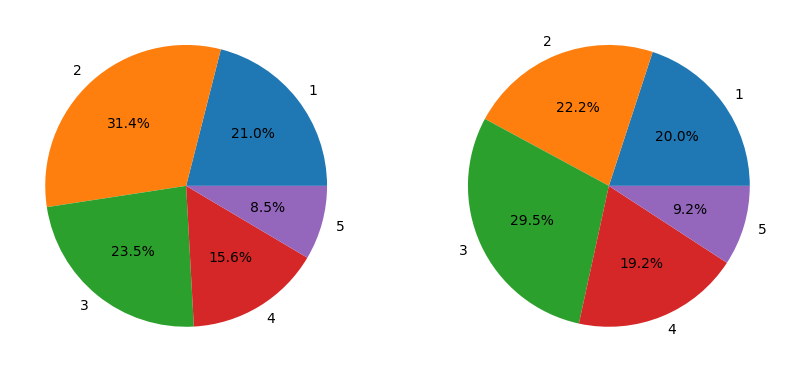

CP1 sin y con exoneracion
1     9386
2    14866
3    13534
4    11805
5    15079
dtype: int64 64670
1     9178
2    14262
3    22130
4    13113
5     5987
dtype: int64 64670


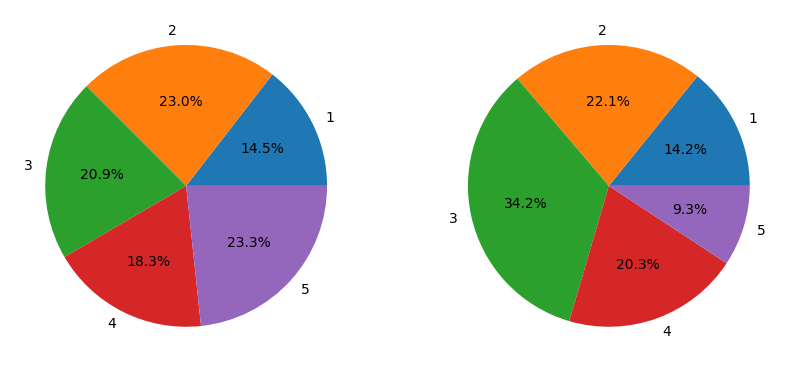

CP2 sin y con exoneracion
1    10784
2    15918
3    13320
4    11513
5    13135
dtype: int64 64670
1    10007
2    15147
3    20856
4    12717
5     5943
dtype: int64 64670


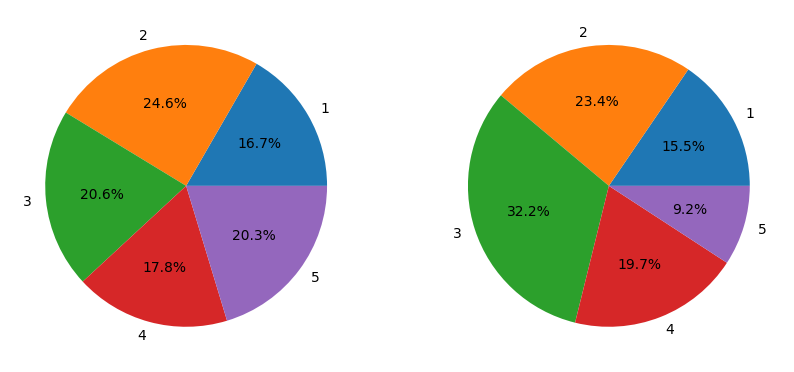

CP3 sin y con exoneracion
1    11666
2    16629
3    13775
4    11487
5    11113
dtype: int64 64670
1    10572
2    15537
3    20187
4    12431
5     5943
dtype: int64 64670


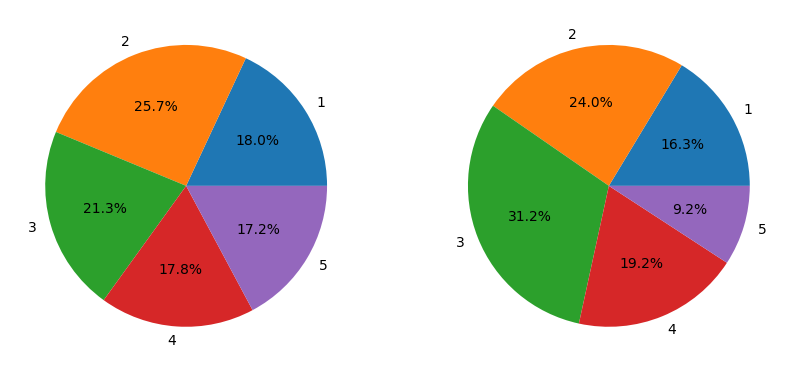

CP4 sin y con exoneracion
1    16481
2    15948
3    10551
4     8828
5    12862
dtype: int64 64670
1    10572
2    15537
3    20187
4    12431
5     5943
dtype: int64 64670


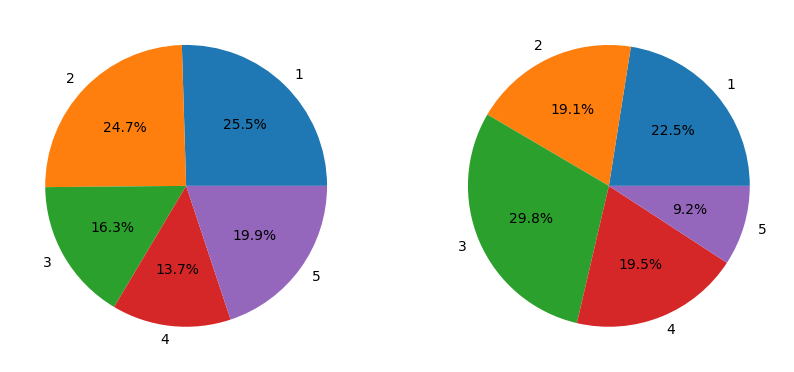

In [ ]:
from scipy.stats import ttest_ind
# PARA CORRER ESTO ES NECESARIO CORRER LA CELDA ANTERIOR Y LA DE LOS ABACOS.

#Solo vamos a considerar las notas en las que tenemos el puntaje obtenido en el final.
#Se consideran las notas de las personas que tienen sus puntajes obtenidos en pruebas finales cargados.
notas_actuales = pd.concat([
    df_rend['Nota.1F'][mask_1F],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F]]) #notas obtenidas en el 3F

#Verificamos si nuestra funcion de obtener_nota es buena replicando los resultados de notas_actuales
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_actuales_estimadas = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_actual,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])



#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio sin tener en cuenta la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_noex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_DA,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio con la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_siex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_noex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP1,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_siex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP1, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_noex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP2,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_siex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP2, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_noex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP3,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_siex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP3, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_noex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP4,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_siex = pd.concat([
    df_rend[mask_1F].apply(lambda x: obtener_nota(abaco_CP4, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

print('Notas actuales')

plt.figure(1,figsize=[10,5])
print(notas_actuales.value_counts().sort_index(), sum(notas_actuales.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_actuales.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_actuales_estimadas.value_counts().sort_index(), sum(notas_actuales_estimadas.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_actuales_estimadas.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('DA sin y con exoneracion')

plt.figure(2,figsize=[10,5])
print(notas_estimadas_noex.value_counts().sort_index(), sum(notas_estimadas_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_siex.value_counts().sort_index(), sum(notas_estimadas_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP1 sin y con exoneracion')

plt.figure(3,figsize=[10,5])
print(notas_estimadas_CP1_noex.value_counts().sort_index(), sum(notas_estimadas_CP1_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP1_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_CP1_siex.value_counts().sort_index(), sum(notas_estimadas_CP1_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP1_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP2 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP2_noex.value_counts().sort_index(), sum(notas_estimadas_CP2_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP2_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP2_siex.value_counts().sort_index(), sum(notas_estimadas_CP2_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP2_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP3 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP3_noex.value_counts().sort_index(), sum(notas_estimadas_CP3_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP3_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP3_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP4 sin y con exoneracion')

plt.figure(5,figsize=[10,5])
print(notas_estimadas_CP4_noex.value_counts().sort_index(), sum(notas_estimadas_CP4_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP4_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP4_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

In [ ]:

#print(ttest_ind(notas_actuales.value_counts().sort_index(),notas_estimadas_noex.value_counts().sort_index()))
notas_actuales.value_counts().sort_index()

1.0     9990
2.0     8766
3.0    10229
4.0    11102
5.0    24583
dtype: int64

Notas actuales
1.0    8165
2.0    5720
3.0    5361
4.0    4516
5.0    5748
dtype: int64 29510
1    9020
2    5449
3    5228
4    4352
5    5461
dtype: int64 29510


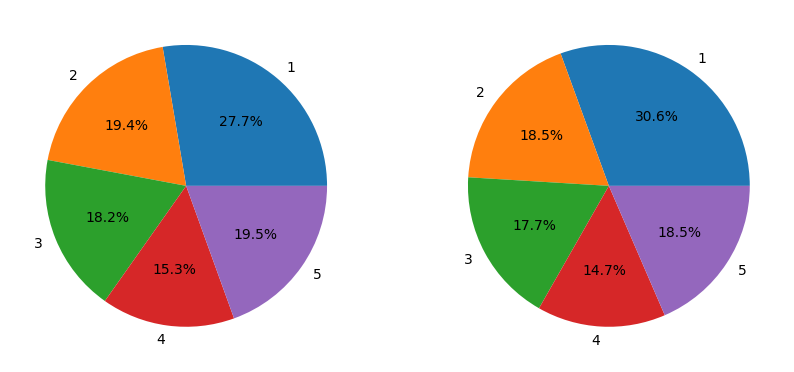

DA sin y con exoneracion
1    10485
2    10412
3     5121
4     2401
5     1091
dtype: int64 29510
1    10052
2     7950
3     7091
4     3291
5     1126
dtype: int64 29510


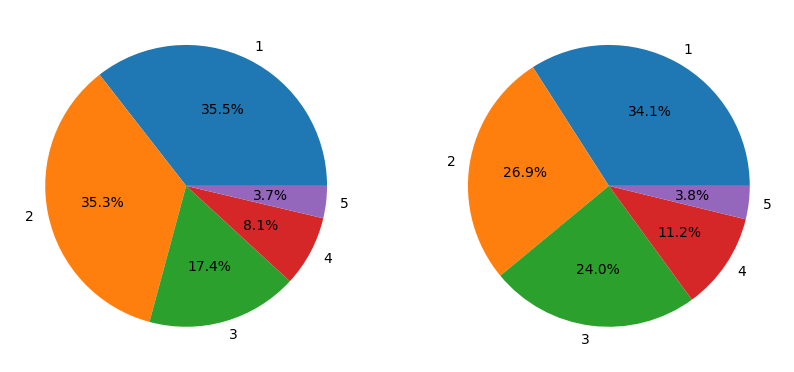

CP1 sin y con exoneracion
1    7730
2    9172
3    5973
4    3730
5    2905
dtype: int64 29510
1    7595
2    8809
3    8433
4    3529
5    1144
dtype: int64 29510


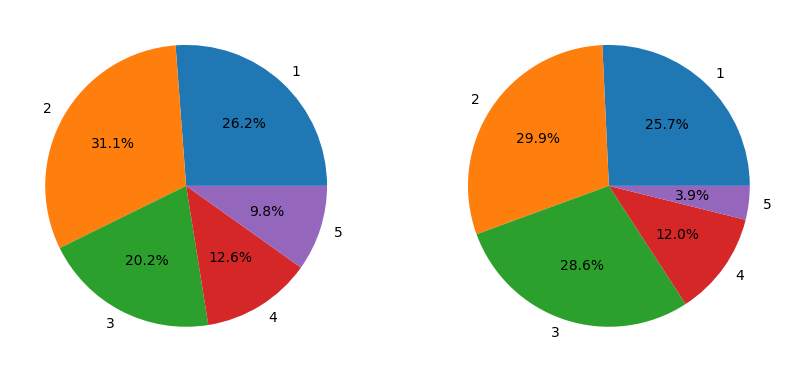

CP2 sin y con exoneracion
1    8595
2    9364
3    5623
4    3481
5    2447
dtype: int64 29510
1    8198
2    8967
3    7831
4    3388
5    1126
dtype: int64 29510


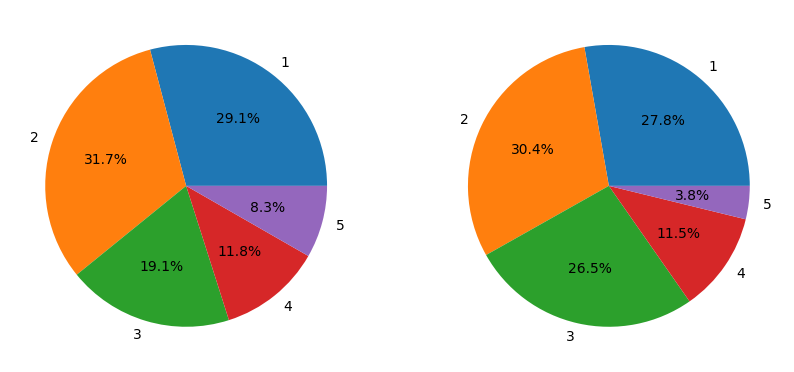

CP3 sin y con exoneracion
1    9165
2    9518
3    5561
4    3251
5    2015
dtype: int64 29510
1    8591
2    8989
3    7513
4    3291
5    1126
dtype: int64 29510


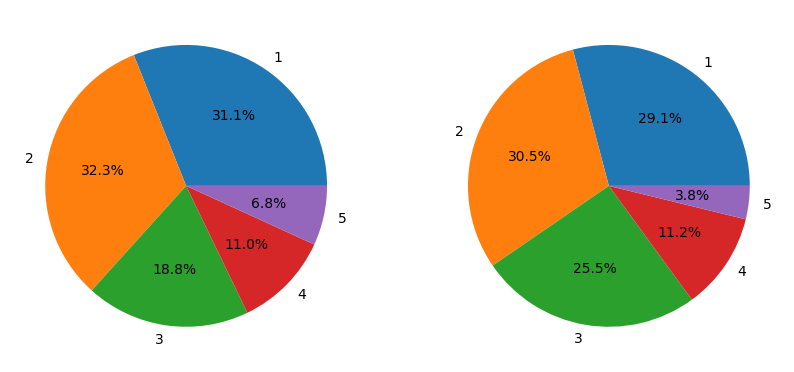

CP4 sin y con exoneracion
1    11942
2     8446
3     4153
4     2584
5     2385
dtype: int64 29510
1    8591
2    8989
3    7513
4    3291
5    1126
dtype: int64 29510


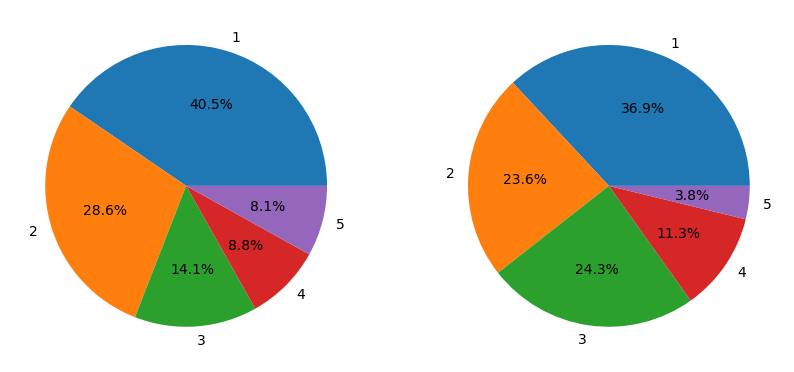

In [ ]:
# REPETIMOS LO ANTERIOR EXCLUSIVAMENTE PARA CURSOS BASICOS

#Solo vamos a considerar las notas en las que tenemos el puntaje obtenido en el final.
#Se consideran las notas de las personas que tienen sus puntajes obtenidos en pruebas finales cargados.
notas_actuales = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CB],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CB],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CB]]) #notas obtenidas en el 3F

#Verificamos si nuestra funcion de obtener_nota es buena replicando los resultados de notas_actuales
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_actuales_estimadas = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_actual,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])


#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio sin tener en cuenta la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_noex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_DA,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio con la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_siex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_noex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_siex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_noex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_siex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_noex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_siex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_noex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_siex = pd.concat([
    df_rend[mask_1F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CB].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

print('Notas actuales')

plt.figure(1,figsize=[10,5])
print(notas_actuales.value_counts().sort_index(), sum(notas_actuales.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_actuales.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_actuales_estimadas.value_counts().sort_index(), sum(notas_actuales_estimadas.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_actuales_estimadas.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('DA sin y con exoneracion')

plt.figure(2,figsize=[10,5])
print(notas_estimadas_noex.value_counts().sort_index(), sum(notas_estimadas_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_siex.value_counts().sort_index(), sum(notas_estimadas_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP1 sin y con exoneracion')

plt.figure(3,figsize=[10,5])
print(notas_estimadas_CP1_noex.value_counts().sort_index(), sum(notas_estimadas_CP1_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP1_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_CP1_siex.value_counts().sort_index(), sum(notas_estimadas_CP1_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP1_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP2 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP2_noex.value_counts().sort_index(), sum(notas_estimadas_CP2_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP2_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP2_siex.value_counts().sort_index(), sum(notas_estimadas_CP2_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP2_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP3 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP3_noex.value_counts().sort_index(), sum(notas_estimadas_CP3_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP3_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP3_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP4 sin y con exoneracion')

plt.figure(5,figsize=[10,5])
print(notas_estimadas_CP4_noex.value_counts().sort_index(), sum(notas_estimadas_CP4_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP4_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP4_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

Notas actuales
1.0     1825
2.0     3046
3.0     4868
4.0     6586
5.0    18835
dtype: int64 35160
1     2158
2     3021
3     4927
4     6574
5    18480
dtype: int64 35160


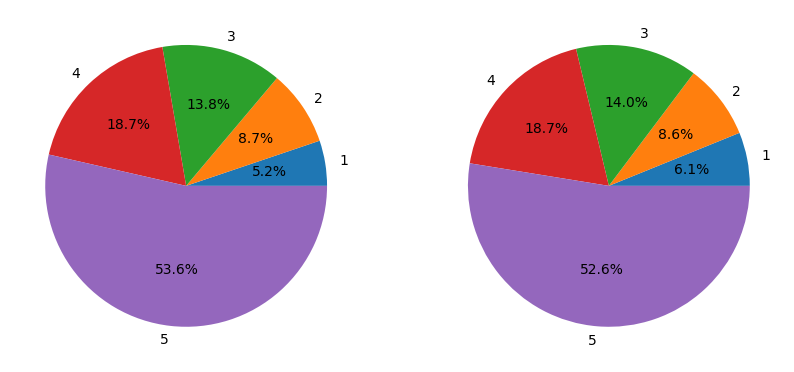

DA sin y con exoneracion
1     3118
2     9881
3    10050
4     7694
5     4417
dtype: int64 35160
1     2862
2     6375
3    11966
4     9140
5     4817
dtype: int64 35160


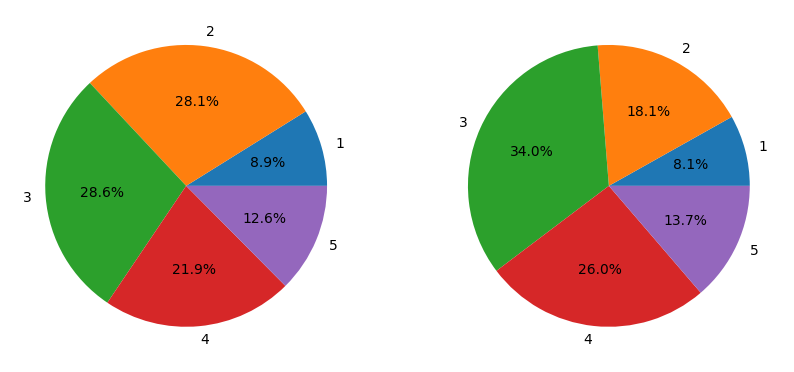

CP1 sin y con exoneracion
1     1656
2     5694
3     7561
4     8075
5    12174
dtype: int64 35160
1     1583
2     5453
3    13697
4     9584
5     4843
dtype: int64 35160


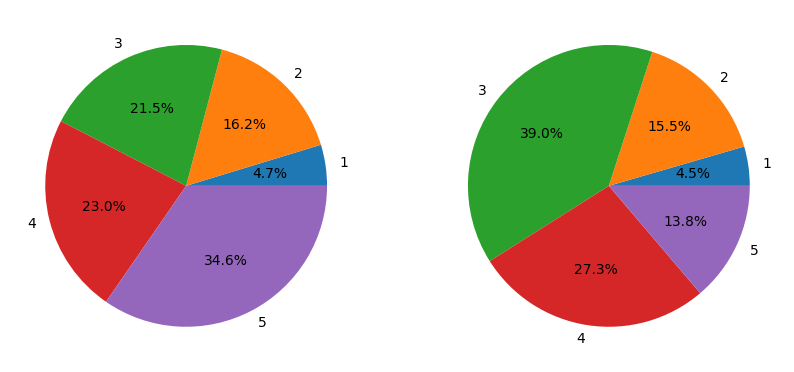

CP2 sin y con exoneracion
1     2189
2     6554
3     7697
4     8032
5    10688
dtype: int64 35160
1     1809
2     6180
3    13025
4     9329
5     4817
dtype: int64 35160


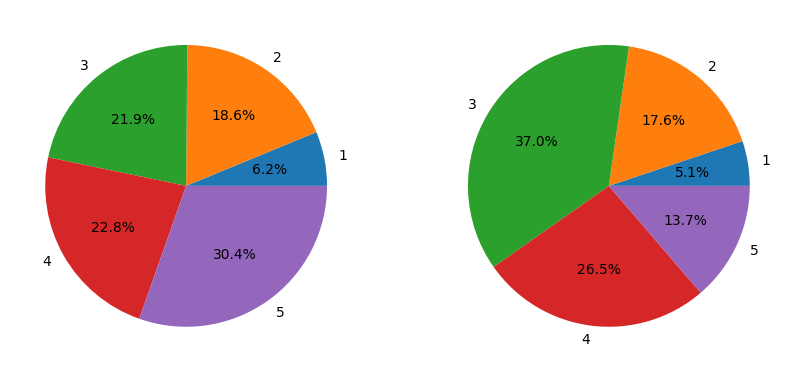

CP3 sin y con exoneracion
1    2501
2    7111
3    8214
4    8236
5    9098
dtype: int64 35160
1     1981
2     6548
3    12674
4     9140
5     4817
dtype: int64 35160


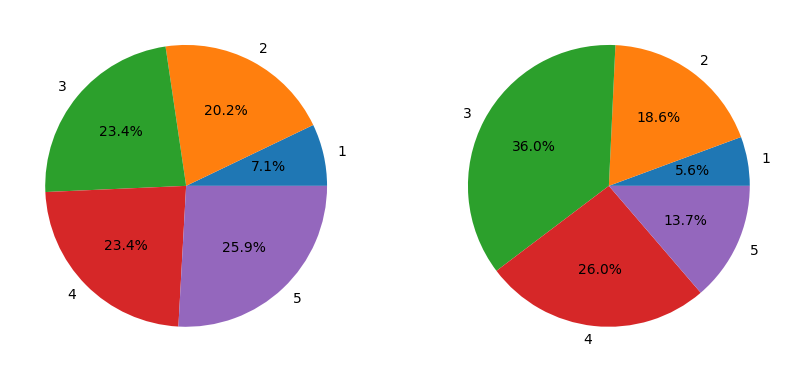

CP4 sin y con exoneracion
1     4539
2     7502
3     6398
4     6244
5    10477
dtype: int64 35160
1     1981
2     6548
3    12674
4     9140
5     4817
dtype: int64 35160


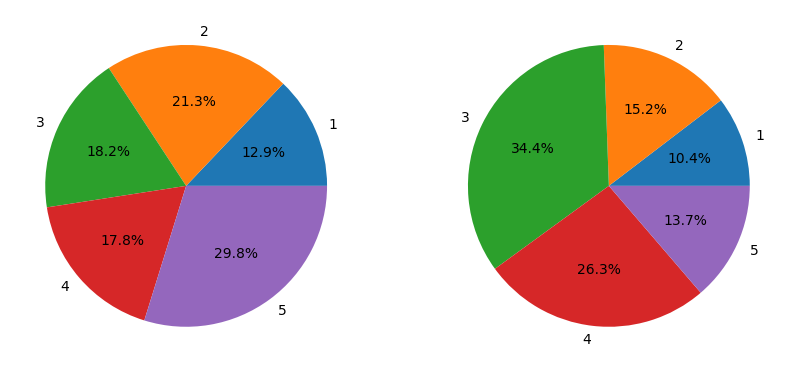

In [ ]:
# REPETIMOS LO ANTERIOR EXCLUSIVAMENTE PARA CURSOS PROFESIONALES

#Solo vamos a considerar las notas en las que tenemos el puntaje obtenido en el final.
#Se consideran las notas de las personas que tienen sus puntajes obtenidos en pruebas finales cargados.
notas_actuales = pd.concat([
    df_rend['Nota.1F'][mask_1F & mask_CP],  #notas obtenidas en el 1F
    df_rend['Nota.2F'][mask_2F & mask_CP],  #notas obtenidas en el 2F
    df_rend['Nota.3F'][mask_3F & mask_CP]]) #notas obtenidas en el 3F

#Verificamos si nuestra funcion de obtener_nota es buena replicando los resultados de notas_actuales
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_actuales_estimadas = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_actual,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_actual,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])


#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio sin tener en cuenta la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_noex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_DA,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_DA,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas luego del cambio con la exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_siex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_DA, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_DA, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_noex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la primera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP1_siex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP1, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_noex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la segunda contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP2_siex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP2, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_noex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la tercera contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP3_siex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP3, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_noex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4,False,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4,False, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

#Ahora plantearemos cual va a ser la distribucion de notas con la cuarta contrapropuesta de abaco con exoneracion
#Aplicamos la funcion obtener_nota a los datos que tienen puntaje en cada final.
notas_estimadas_CP4_siex = pd.concat([
    df_rend[mask_1F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4, True,     x['1P+2P+T']                     , x['P1F']),axis='columns'),
    df_rend[mask_2F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'])          , x['P2F']),axis='columns'),
    df_rend[mask_3F & mask_CP].apply(lambda x: obtener_nota(abaco_CP4, True, max(x['1P+2P+T'],x['1R+T'],x['2R+T']), x['P3F']),axis='columns')])

print('Notas actuales')

plt.figure(1,figsize=[10,5])
print(notas_actuales.value_counts().sort_index(), sum(notas_actuales.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_actuales.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_actuales_estimadas.value_counts().sort_index(), sum(notas_actuales_estimadas.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_actuales_estimadas.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('DA sin y con exoneracion')

plt.figure(2,figsize=[10,5])
print(notas_estimadas_noex.value_counts().sort_index(), sum(notas_estimadas_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_siex.value_counts().sort_index(), sum(notas_estimadas_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP1 sin y con exoneracion')

plt.figure(3,figsize=[10,5])
print(notas_estimadas_CP1_noex.value_counts().sort_index(), sum(notas_estimadas_CP1_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP1_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)

print(notas_estimadas_CP1_siex.value_counts().sort_index(), sum(notas_estimadas_CP1_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP1_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP2 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP2_noex.value_counts().sort_index(), sum(notas_estimadas_CP2_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP2_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP2_siex.value_counts().sort_index(), sum(notas_estimadas_CP2_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP2_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP3 sin y con exoneracion')

plt.figure(4,figsize=[10,5])
print(notas_estimadas_CP3_noex.value_counts().sort_index(), sum(notas_estimadas_CP3_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP3_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP3_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

print('CP4 sin y con exoneracion')

plt.figure(5,figsize=[10,5])
print(notas_estimadas_CP4_noex.value_counts().sort_index(), sum(notas_estimadas_CP4_noex.value_counts()))
plt.subplot(1,2,1)
plt.pie(notas_estimadas_CP4_noex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
print(notas_estimadas_CP3_siex.value_counts().sort_index(), sum(notas_estimadas_CP3_siex.value_counts()))
plt.subplot(1,2,2)
plt.pie(notas_estimadas_CP4_siex.value_counts().sort_index(),labels=['1','2','3','4','5'],autopct='%1.1f%%',startangle=0)
plt.show()

# Esto es para comprobar cuantas personas van a tercer final, para cuantas es su primera oportunidad de rendir y que tanto se aprobecha.

In [ ]:
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import pandas as pd

df_rend = pd.read_excel('/content/rend_2016a2022_V2.xlsx')

En general se tiene:  ( 68090  notas finales)


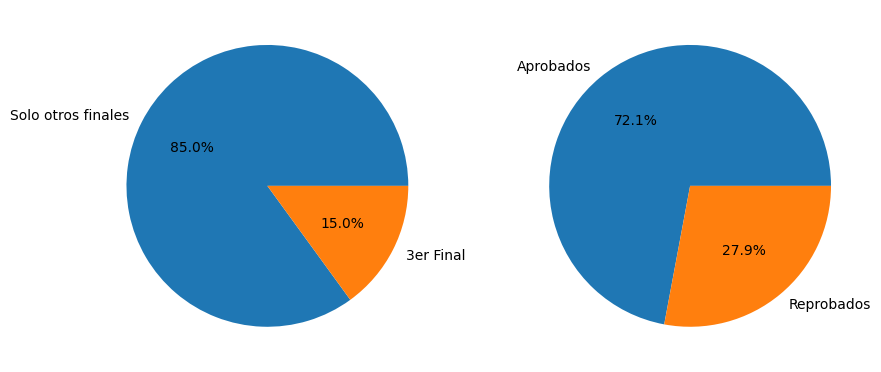

En cursos basicos:  ( 30259  notas finales)


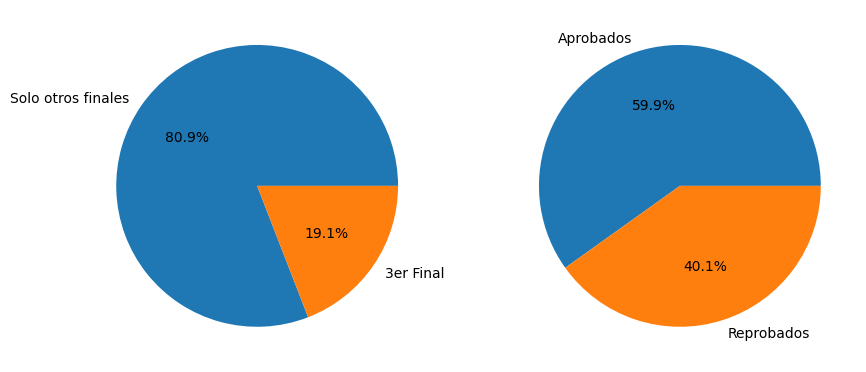

En cursos profesionales:  ( 37831  notas finales)


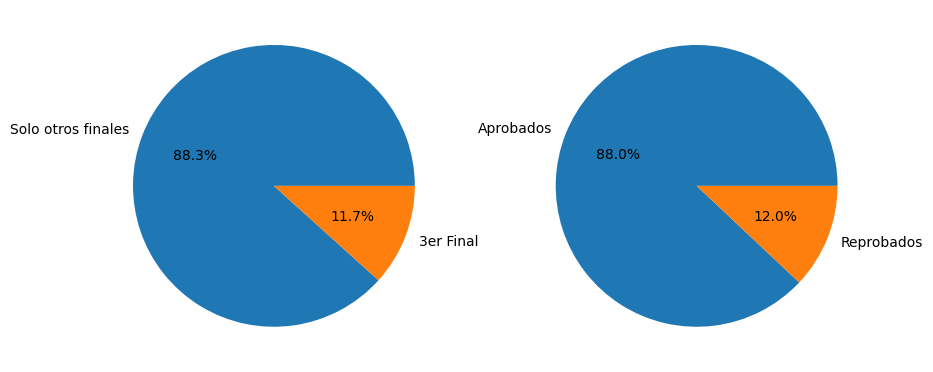

"\nmask_paso    = (df_finales['Aprobado']==1)#&(df_finales['Anho']==2018)\nmask_solo_3F = ((df_finales['1F']==0)&(df_finales['2F']==0)&(df_finales['3F']!=0))#&(df_finales['Anho']==2018)\nmask_rinde_F = ((df_finales['1F']!=0)|(df_finales['2F']!=0)|(df_finales['3F']!=0))#&(df_finales['Anho']==2018)\n\nmask_notas_2018   = (df_finales['Anho']==2018)\nmask_3F_2018      = (df_finales['3F']!=0)&(df_finales['Anho']==2018)\nmask_paso_2018    = (df_finales['Aprobado']==1)&(df_finales['Anho']==2018)\nmask_solo_3F_2018 = ((df_finales['1F']==0)&(df_finales['2F']==0)&(df_finales['3F']!=0))&(df_finales['Anho']==2018)\nmask_rinde_F_2018 = ((df_finales['1F']!=0)|(df_finales['2F']!=0)|(df_finales['3F']!=0))&(df_finales['Anho']==2018)\n\n\n## PARA IMPRIMIR LOS RESULTADOS EN GENERAL DE 2012 A 2018\nprint(len(df_finales),' notas en total desde 2012 hasta 2018.')\nprint(sum(mask_3F),\n      ' rindieron 3er final (',\n      round(100*sum(mask_3F)/len(df_finales),2),\n      '% del total).')\nprint(sum((mask_3

In [ ]:

#No queremos lo que este desde el 2020 debido a las situaciones extraordinarias
df_rend = df_rend[df_rend['Anho']<2020]

#Mascara de las personas que rinden final
mask_rinden  = (~np.isnan(df_rend['Nota.1F']))|(~np.isnan(df_rend['Nota.2F']))|(~np.isnan(df_rend['Nota.3F']))
#Mascara de las personas que tienen una nota en tercer final
mask_3F      = (~np.isnan(df_rend['Nota.3F']))
#Mascara de las personas que aprueban
mask_paso    = (df_rend['Aprobado']==1)
#Mascaras para cursos basicos y cursos profesionales
mask_CB      = (df_rend['Semestre']<5)
mask_CP      = (df_rend['Semestre']>=5)

print('En general se tiene: ','(',sum(mask_rinden),' notas finales)')
plt.figure(1,figsize=[10,5])
plt.subplot(1,2,1)
plt.pie([sum(mask_rinden)-sum(mask_3F),sum(mask_3F)],labels=['Solo otros finales','3er Final'],autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.pie([sum(mask_3F & mask_paso),sum(mask_3F & ~mask_paso)],labels=['Aprobados','Reprobados'],autopct='%1.1f%%')
plt.show()

print('En cursos basicos: ','(',sum(mask_rinden & mask_CB),' notas finales)')
plt.figure(2,figsize=[10,5])
plt.subplot(1,2,1)
plt.pie([sum(mask_rinden & mask_CB)-sum(mask_3F & mask_CB),sum(mask_3F & mask_CB)],labels=['Solo otros finales','3er Final'],autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.pie([sum(mask_3F & mask_paso & mask_CB),sum(mask_3F & ~mask_paso & mask_CB)],labels=['Aprobados','Reprobados'],autopct='%1.1f%%')
plt.show()

print('En cursos profesionales: ','(',sum(mask_rinden & mask_CP),' notas finales)')
plt.figure(3,figsize=[10,5])
plt.subplot(1,2,1)
plt.pie([sum(mask_rinden & mask_CP)-sum(mask_3F & mask_CP),sum(mask_3F & mask_CP)],labels=['Solo otros finales','3er Final'],autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.pie([sum(mask_3F & mask_paso & mask_CP),sum(mask_3F & ~mask_paso & mask_CP)],labels=['Aprobados','Reprobados'],autopct='%1.1f%%')
plt.show()

'''
mask_paso    = (df_finales['Aprobado']==1)#&(df_finales['Anho']==2018)
mask_solo_3F = ((df_finales['1F']==0)&(df_finales['2F']==0)&(df_finales['3F']!=0))#&(df_finales['Anho']==2018)
mask_rinde_F = ((df_finales['1F']!=0)|(df_finales['2F']!=0)|(df_finales['3F']!=0))#&(df_finales['Anho']==2018)

mask_notas_2018   = (df_finales['Anho']==2018)
mask_3F_2018      = (df_finales['3F']!=0)&(df_finales['Anho']==2018)
mask_paso_2018    = (df_finales['Aprobado']==1)&(df_finales['Anho']==2018)
mask_solo_3F_2018 = ((df_finales['1F']==0)&(df_finales['2F']==0)&(df_finales['3F']!=0))&(df_finales['Anho']==2018)
mask_rinde_F_2018 = ((df_finales['1F']!=0)|(df_finales['2F']!=0)|(df_finales['3F']!=0))&(df_finales['Anho']==2018)


## PARA IMPRIMIR LOS RESULTADOS EN GENERAL DE 2012 A 2018
print(len(df_finales),' notas en total desde 2012 hasta 2018.')
print(sum(mask_3F),
      ' rindieron 3er final (',
      round(100*sum(mask_3F)/len(df_finales),2),
      '% del total).')
print(sum((mask_3F)&(mask_paso)),
      ' pasaron en 3er final (',
      round(100*sum((mask_3F)&(mask_paso))/len(df_finales),2),
      '% del total, ',
      round(100*sum((mask_3F)&(mask_paso))/sum(mask_3F),2),
      '% de los que rindieron).')
print(sum(mask_solo_3F),
      ' solamente rindieron 3er final (',
      round(100*sum(mask_solo_3F)/len(df_finales),2),
      '% del total, ',
      round(100*sum(mask_solo_3F)/sum(mask_3F),2),
      '% de los que rindieron 3er Final).')
print(sum((mask_solo_3F)&(mask_paso)),
      ' de los anteriores pasaron (',
      round(100*sum((mask_solo_3F)&(mask_paso))/len(df_finales),2),
      '% del total, ',
      round(100*sum((mask_solo_3F)&(mask_paso))/sum(mask_solo_3F),2),
      '% de los que solo rindieron este examen).\n')

## PARA IMPRIMIR EXCLUSIVAMENTE LO REFERENTE AL 2018
print(sum(mask_notas_2018),' notas en total en el 2018.')
print(sum(mask_3F_2018),
      ' rindieron 3er final (',
      round(100*sum(mask_3F_2018)/sum(mask_notas_2018),2),
      '% del total).')
print(sum((mask_3F_2018)&(mask_paso_2018)),
      ' pasaron en 3er final (',
      round(100*sum((mask_3F_2018)&(mask_paso_2018))/sum(mask_notas_2018),2),
      '% del total, ',
      round(100*sum((mask_3F_2018)&(mask_paso_2018))/sum(mask_3F_2018),2),
      '% de los que rindieron).')
print(sum(mask_solo_3F_2018),
      ' solamente rindieron 3er final (',
      round(100*sum(mask_solo_3F_2018)/sum(mask_notas_2018),2),
      '% del total, ',
      round(100*sum(mask_solo_3F_2018)/sum(mask_3F_2018),2),
      '% de los que rindieron 3er Final).')
print(sum((mask_solo_3F_2018)&(mask_paso_2018)),
      ' de los anteriores pasaron (',
      round(100*sum((mask_solo_3F_2018)&(mask_paso_2018))/sum(mask_notas_2018),2),
      '% del total, ',
      round(100*sum((mask_solo_3F_2018)&(mask_paso_2018))/sum(mask_solo_3F_2018),2),
      '% de los que solo rindieron este examen).')
'''

## COSAS VIEJAS

## Este bloque fue utilizado para transformar la columna Nota.Final en tres columnas que tengan la nota obtenida en cada examen final

In [ ]:
import pandas as pd

df_rendimiento = pd.read_excel('/content/rend_2016a2022_modificado.xlsx')
                             #usecols=['Nota.Final','Nota.1F','Nota.2F','Nota.3F']
listas_de_notas = []
aux_notas = []
for notas in df_rendimiento['Nota.Final']:
  f1=np.nan; f2=np.nan; f3=np.nan;
  try:
    aux_notas = sorted(notas.split(','))
    for n in aux_notas:
      if n[0:2]=='1F':
        f1 = int(n[-1])
      if n[0:2]=='2F':
        f2 = int(n[-1])
      if n[0:2]=='3F':
        f3 = int(n[-1])
    listas_de_notas.append([f1,f2,f3])
  except:
    listas_de_notas.append([f1,f2,f3])

df_rendimiento[['Nota.1F','Nota.2F','Nota.3F']] = listas_de_notas

df_rendimiento[['Nota.1F','Nota.2F','Nota.3F']].head(10)

df_rendimiento.to_excel('/content/rend_2016a2022_V2.xlsx')

In [ ]:
#df_rendimiento['Nota.Final'][0:50]
print(listas_de_notas[26])
print(listas_de_notas[26][1][0:2])
print(listas_de_notas[26][1][-1])


In [ ]:
import numpy as np

np.isnan(df_rendimiento['Nota.Final'][1])


In [ ]:
import pandas as pd

df_rendimiento = pd.read_excel('/content/rend_2016a2022_V2.xlsx')
                             #usecols=['Nota.Final','Nota.1F','Nota.2F','Nota.3F']
df_rendimiento.head(10)

In [ ]:
max(10,20)